# Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

# Objective

1) To predict whether a liability customer will buy a personal loan or not.  
2) Which variables are most significant.  
3) Which segment of customers should be targeted more.  

### Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Library Import

In [1]:
# Import main libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # I prefer when all columns are displayed

# Import plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) #to make things look a little prettier
%matplotlib inline

# Filter warnings to make things look nicer
import warnings
warnings.filterwarnings("ignore")

# Import sklearn tools for Linear Regression and testing model
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # To scale some values before creating the linear regression model
from sklearn.model_selection import train_test_split  # To split data into train and test sets
from statsmodels.stats.outliers_influence import variance_inflation_factor #To check for multicollinearity in our linear regression model


# Libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, f1_score
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats


# Exploratory Data Analysis

### Initial data read and first look

In [2]:
df = pd.read_csv("Loan_Modelling.csv")

In [3]:
df.head() # let's look at the head and tail of the data

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [5]:
np.random.seed(1)
df.sample(n=10)  # let's look at a random sample of the data

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
2764  2765   31           5      84    91320       1    2.9          3   
4767  4768   35           9      45    90639       3    0.9          1   
3814  3815   34           9      35    94304       3    1.3          1   
3499  3500   49          23     114    94550       1    0.3          1   
2735  2736   36          12      70    92131       3    2.6          2   
3922  3923   31           4      20    95616       4    1.5          2   
2701  2702   50          26      55    94305       1    1.6          2   
1179  1180   36          11      98    90291       3    1.2          3   
932    933   51          27     112    94720       3    1.8          2   
792    793   41          16      98    93117       1    4.0          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
2764       105              0                   0           0       0   
4767       101              0                   1           0       0   
3814         0              0                   0           0       0   
3499       286              0                   0           0       1   
2735       165              0                   0           0       1   
3922         0              0                   0           0       1   
2701         0              0                   0           0       1   
1179         0              0                   1           0       0   
932          0              0                   1           1       1   
792          0              0                   0           0       0   

      CreditCard  
2764           1  
4767           0  
3814           0  
3499           0  
2735           0  
3922           0  
2701           0  
1179           1  
932            1  
792            1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.nunique() # now let's have a look at the number of unique values in each column

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [8]:
df.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

#### First Impressions  

* The data have 14 columns and 5000 rows. There are no null values, which is good news. Also, all of the columns are numerical so it's likely there are no values like, "unknown", "null" or "?" in the data. More good news. However, there are some negative values in Experience which we will need to treat.  
* The column names have no spaces, dashes or other strange characters so they don't need any processing.

* The ID column exactly matches the index, it likely has no relationship with our target variable (Personal_Loan), so we can safely drop it.
* CCAve is the only float64 feature. All the other features are integers. Age, Expreience, Income and Mortgage are all continuous variables with interger values. It looks like Income and Mortgage are skewed, so we will need to treat that.
* Family and Education are similar, they have an order that is meaningful but the small number of values makes them somewhat of a catergorical varible.
* Personal_Loan, Securities_Account, CD_Account, Online and Credit card are all simple categorical variables with (I assume) 0 = no/does not have and 1 = yes/does have

* The only variable that looks really problematic is ZIPCode. It's catergorical, it's not ordinal and there are 467 distinct values. We will see what to do with this as time goes on.


In [9]:
df.drop(['ID'], axis = 1, inplace=True) #drop the ID column before moving on. We don't need it

# Univariate Analysis

## Continuous Variables

In [10]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create a boxplot and a histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplot 
# and histogram for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

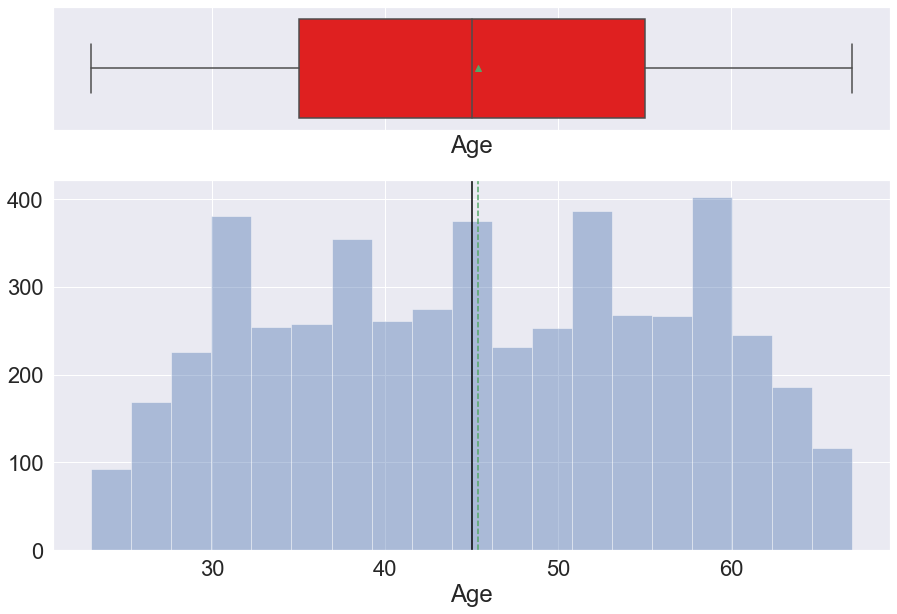

In [11]:
histogram_boxplot(df.Age)

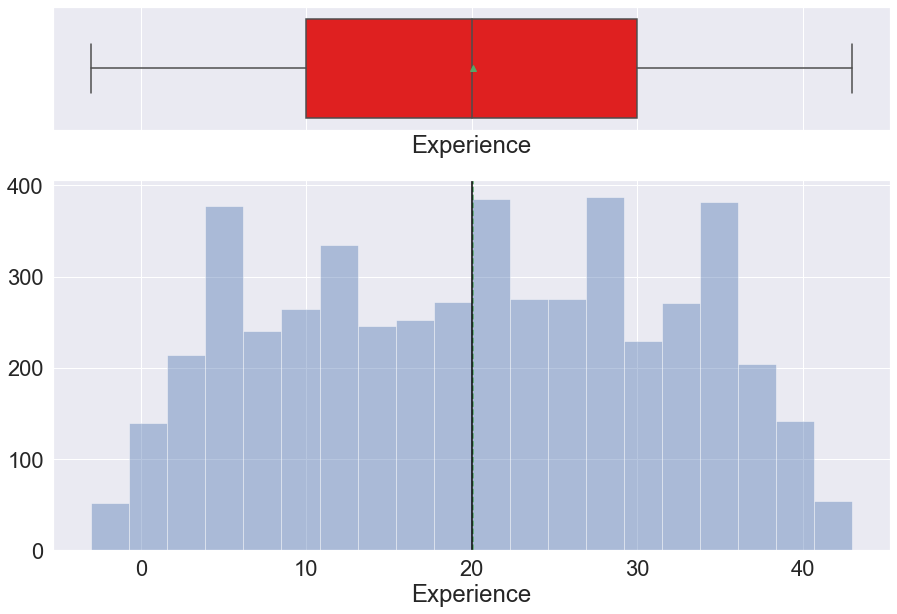

In [12]:
histogram_boxplot(df.Experience)

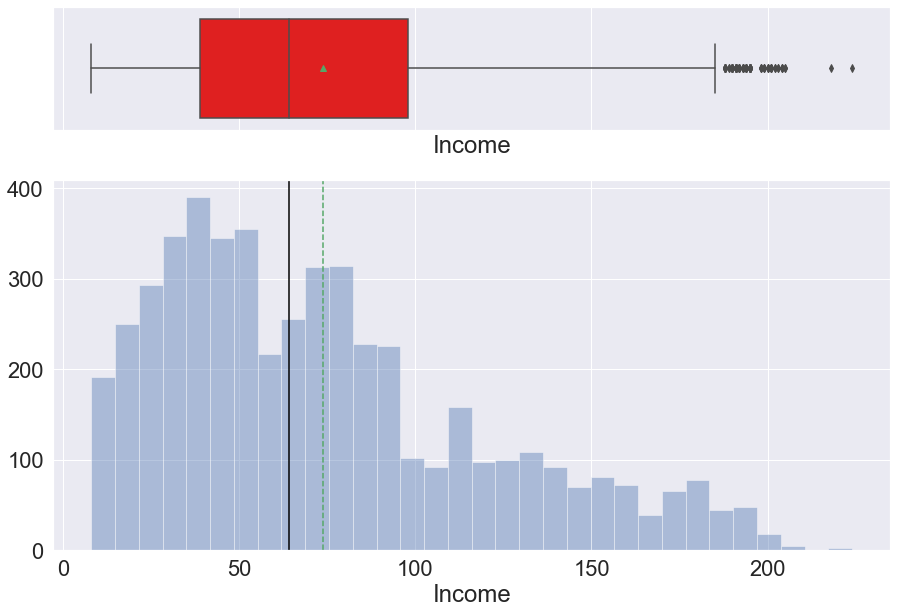

In [13]:
histogram_boxplot(df.Income)

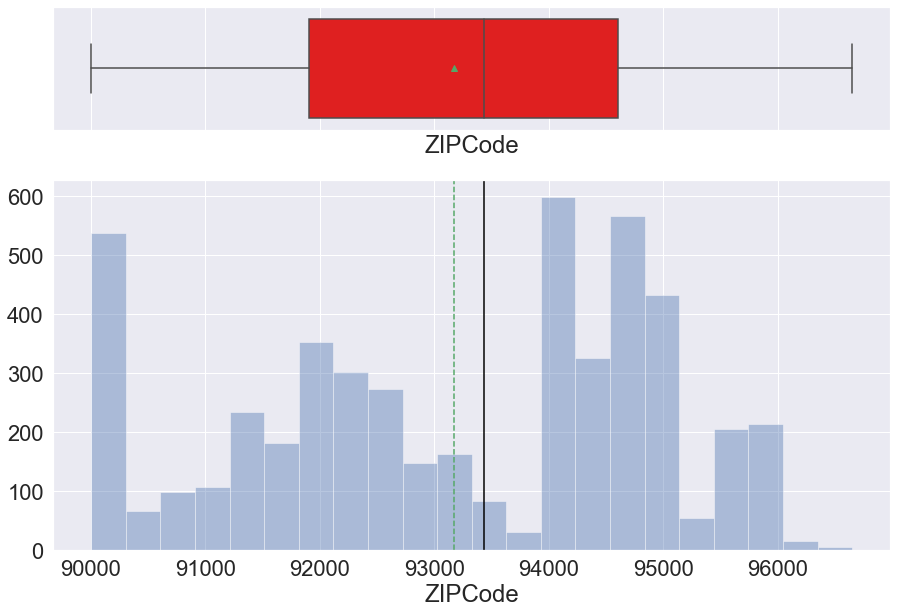

In [14]:
histogram_boxplot(df.ZIPCode)

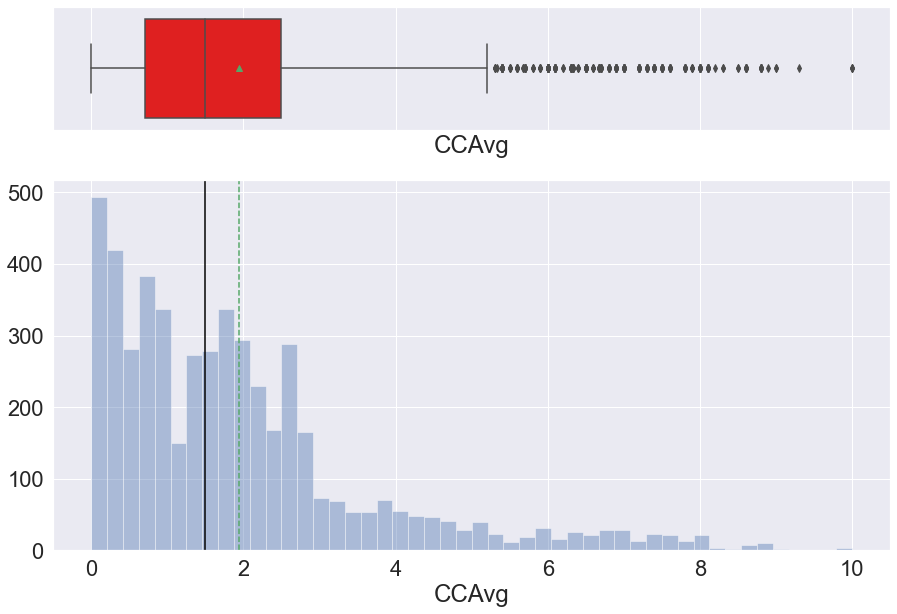

In [15]:
histogram_boxplot(df.CCAvg)

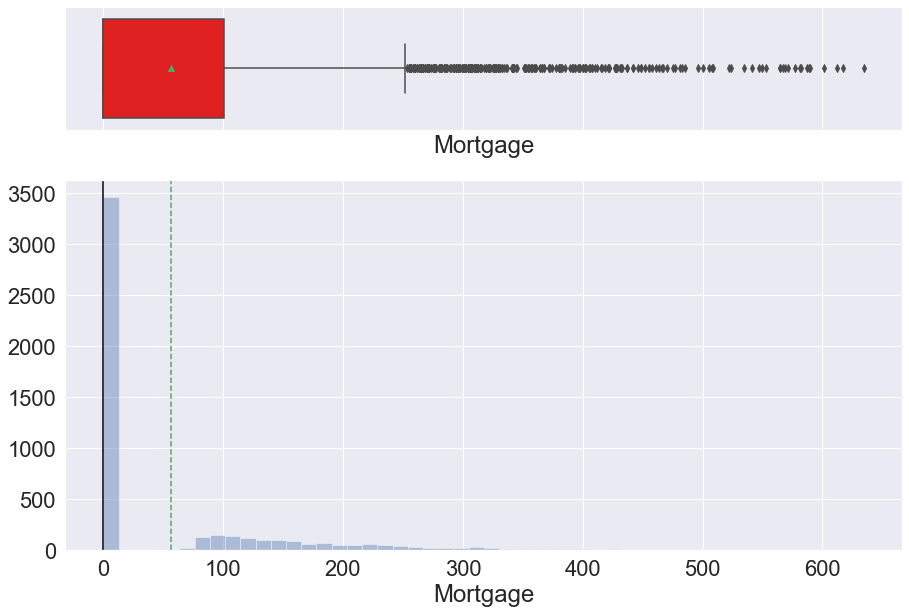

In [16]:
histogram_boxplot(df.Mortgage)

### Comments on Continuous Variables

* Age: This looks to be normally distributed but with a large standard deviation
* Experience: Again, normally distributed with a large standard deviation. The distribution looks very similar to the Age distribution and my guess is that these two columns will be highly correlated. We know there are some values below zero, which are impossible. Fortunately, it does not look like there are too many.
* Income: These data are slightly skewed to the right. There are a few outliers.
* ZIP Code: Technically, this is not a continuous variable but plotting it this way shows us: There are some ZIP codes with more values than the others. The range of values is not extreme in any way. I.e. all the values look like Zip codes from a single city/area.
* CCAvg: These data are right skewed and have a number of zero values. Again there are a few outliers.
* Mortgage: These data are very heavily right skewed. The bulk of the customers have no mortgage (zero value). The remaining have a mortgage for 100s of thousands of dollars.

## Categorical Variables

In [17]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(df[z]) # length of the column
    plt.figure(figsize=(15,5))
    plt.xticks(rotation=0)
    ax = sns.countplot(df[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage 
    plt.show() # show the plot

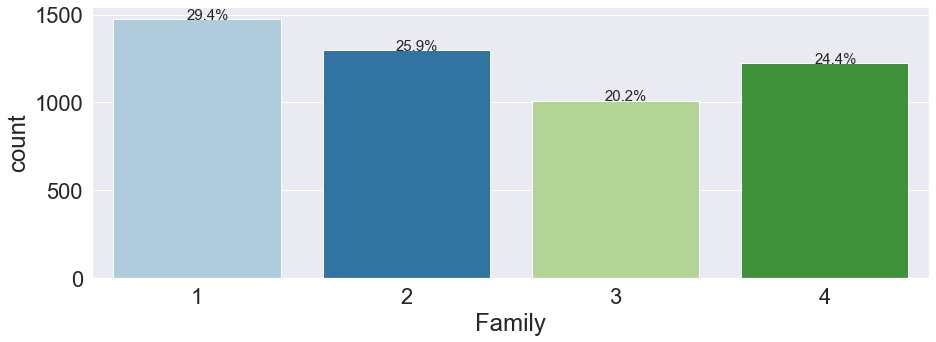

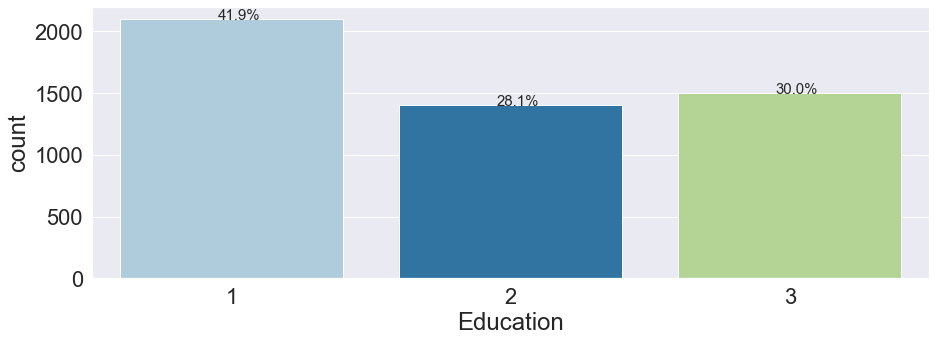

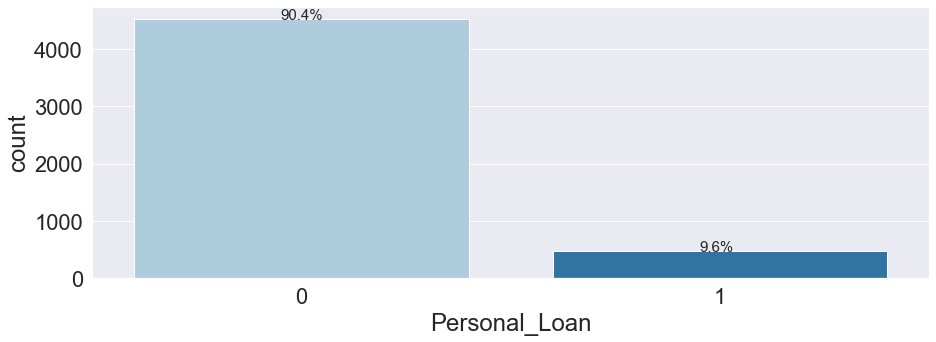

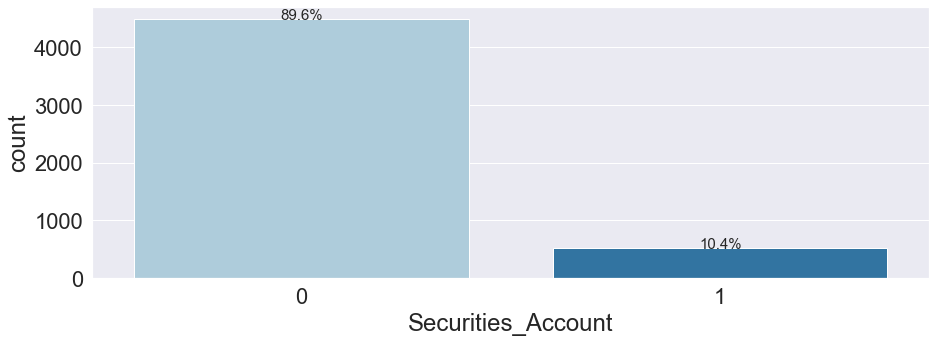

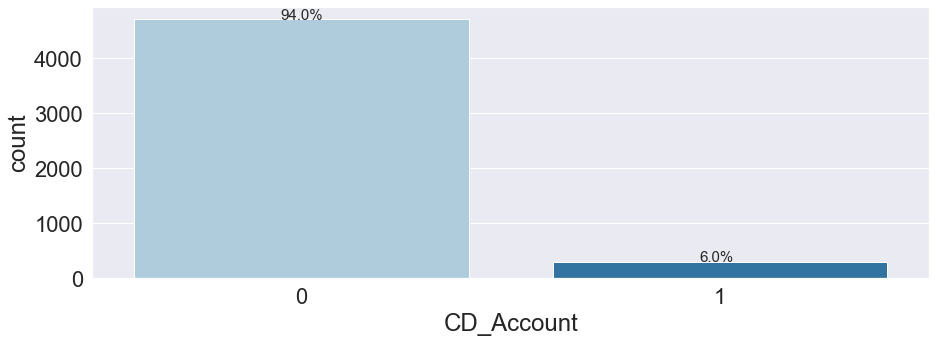

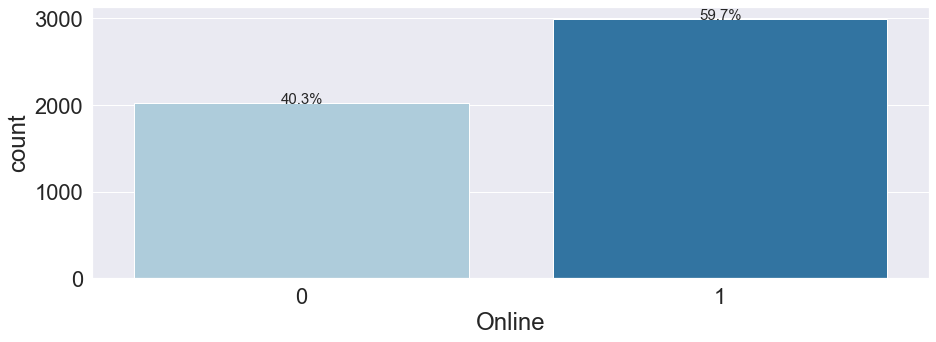

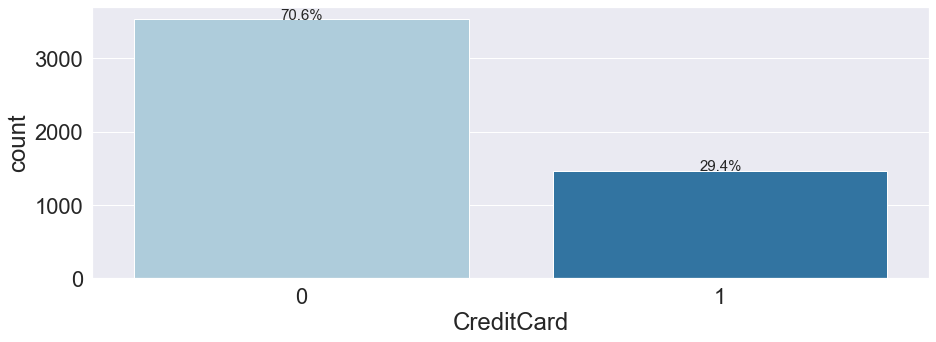

In [18]:
cols_to_plot = ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

for col in cols_to_plot:
    perc_on_bar(col)

### Comments on Categorical Variables:
* Family: The data are fairly evenly split between the categories, with slightly more customers being single.
* Education: Again a fairly even split, although more than 40% of customers have education level 1.
* Personal Loan: Our target variable is very unbalanced. Only 9.6% of customers have a personal loan. Hopefully our analysis will improve that number in the future.
* Securities Account: Just over 10% of customers have a securities account. A very unbalanced categorical variable.
* CD Account: Another unbalanced varibale with only 6% of customers having a CD Account.
* Online: The data are more balance with an approximate 60-40 split. With 60% of customers using the online banking facilities.
* Credit Card: Approximately 30% of customers hold a credit card with another bank (not All Life Bank).

# Bivariate Analysis

### All Variables

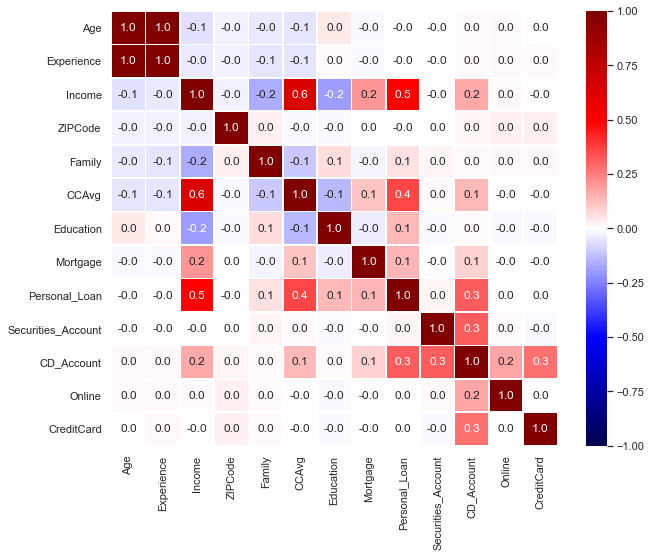

In [19]:
# Let's start by looking for correlation in the data
corr = df.corr()

sns.set(font_scale=1)
fix, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7);

* We can see that age and experience are near perfectly correlated. It's likely that we will drop one of these columns. We will look at VIF scores later.  
* People with higher incomes tend to have higher average credit card spending per month (0.6 correlation). They also appear to be more likely to have a mortgage and CD Account.
* Of all the variables, income has the highest correlation with our target variable, personal_loan. People with higher incomes tend to take out more personal loans.
* It also appears that people who hold a CD Account with the bank are more likely to have a personal loan.
* Interestingly, income does not appear to correlate with education or experience.

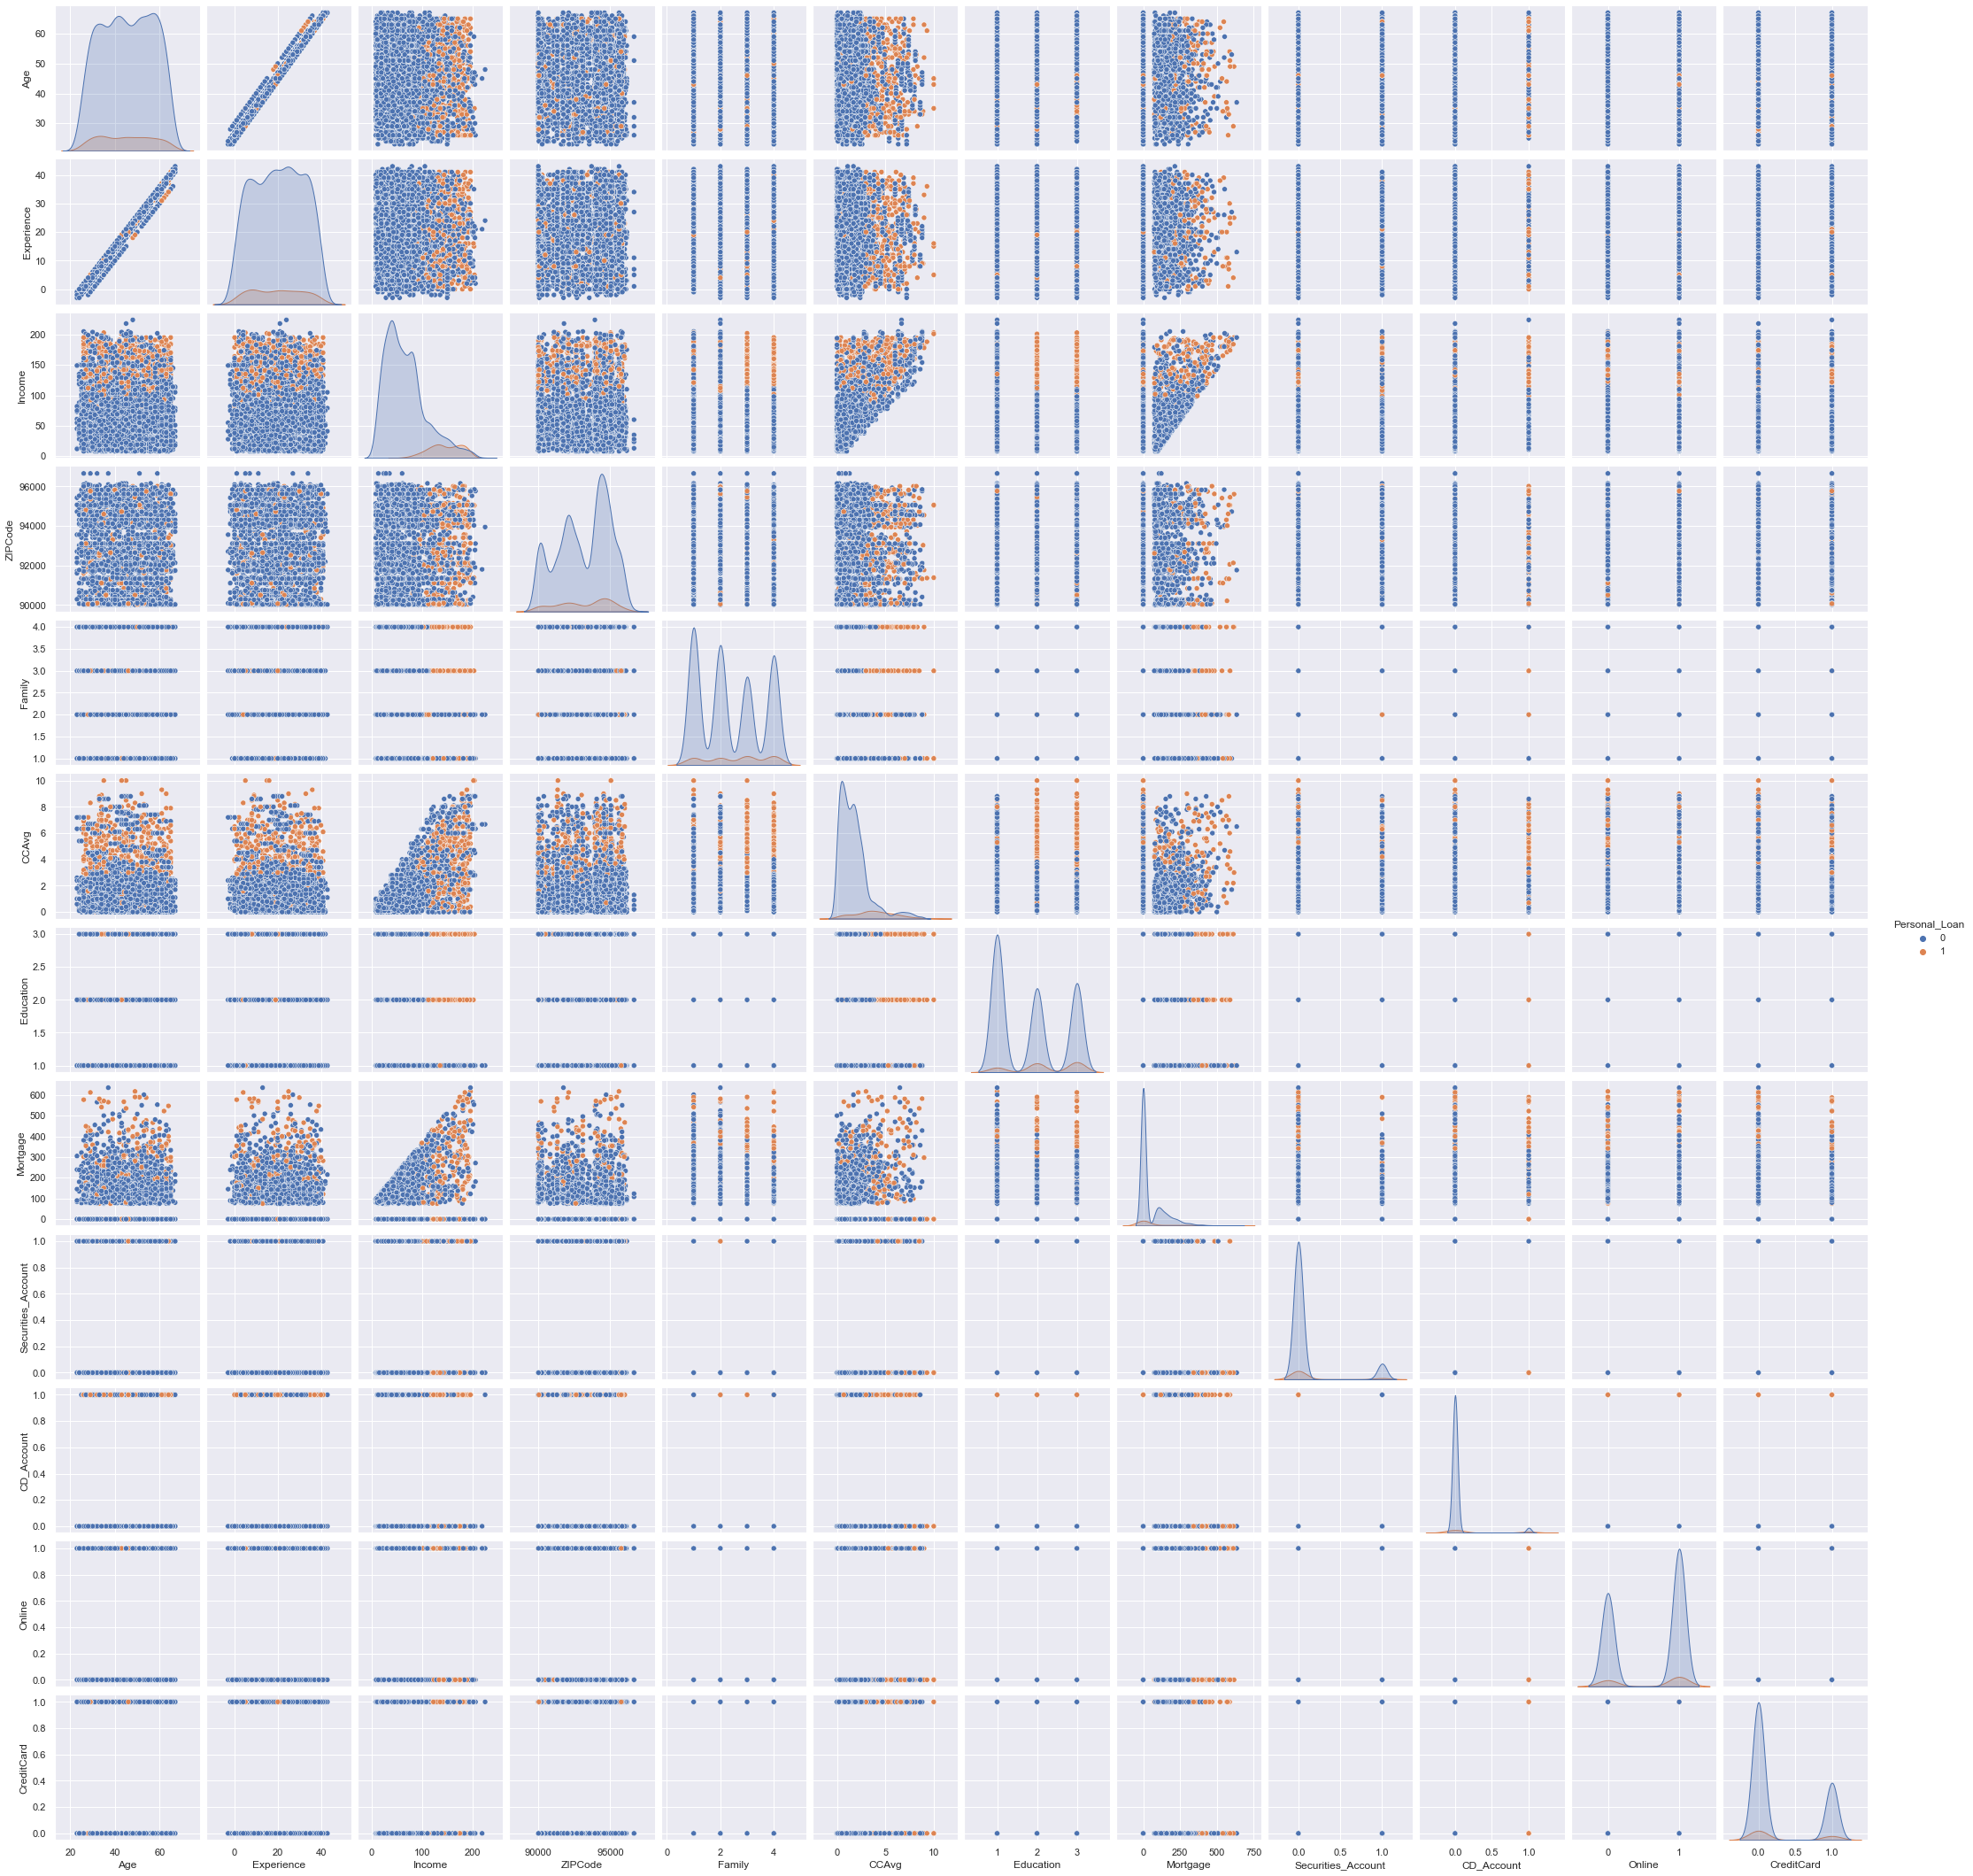

In [20]:
# Now let's look again at all the data in a pair plot. We will colour by our target variable and see what stands out.
sns.pairplot(df, hue='Personal_Loan')

Observations:
* The yellow colour, indicating the customer has a personal loan, stands out when income or CCAvg are high. Also when education AND mortgage are high, when education AND Income are high, when family AND Income are high. We will look into this more below.
* We can clearly see the near perfect correlation between age and experience.
* There is a relationship between income and mortgage. Likely because, as income goes up, the bank will lend more money on a mortgage. There is a similar relationship between income and CCAvg, likely because people with a higher income can afford to put more on their credit card each month.

### Continuous Variables vs. Personal Loan

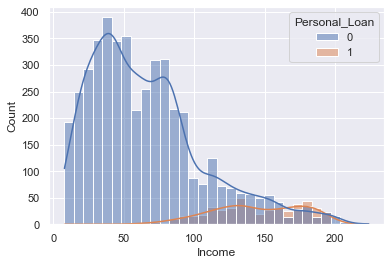

In [21]:
sns.histplot(data=df, x='Income', hue='Personal_Loan', kde=True);

Above is a plot we saw in the pair plots, that I wanted to zoom in on. We can see that customers with a high income are much more likely to have a personal loan than customers with a low incomw. Above $150k income, almost 50\% of the customers have a personal loan. At some of the very high income levels, the number of customers with a personal loan outnumber the customers without a personal loan. Given the high conversion rate of high income customers, the bank should focus on these customers for their next personal loan marketing campaign.

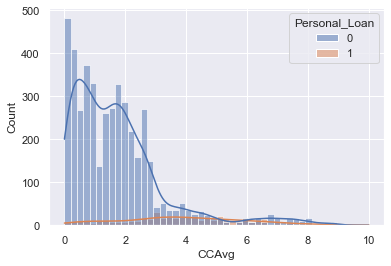

In [22]:
sns.histplot(data=df, x='CCAvg', hue='Personal_Loan', kde=True);

Above is a plot of CCAvg (Average credit card spending per month) coloured by our target variable. We can see that customers with a personal loan are spread over the entire range of CCAve values. However, at larger CCAve values, the proportion of customers who have personal loan becomes larger. I.e. at low CCAve values there are many more customers without a personal loan than customers with a personal loan. At high CCAve values, the number of customers without a personal loan is about even with the amount of customers with a personal loan.

We know that Income and CCAve are related. It is likely that Income is the more important variable here. However, the combination of the two variables (high income and high CCAve) is likely a good target demographic for the upcoming marketing campaign given the high conversion rate of customers in this demographic in the last one. The graph below shows Income vs. CCAvg, coloured by Personal_Loan.

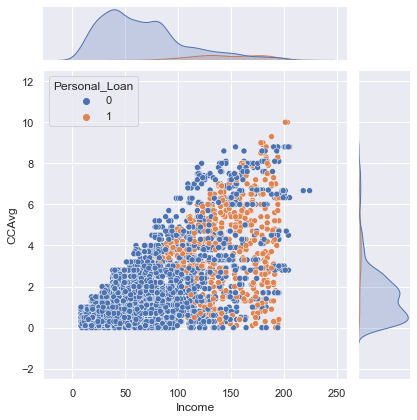

In [23]:
sns.jointplot(data=df, x='Income', y='CCAvg', hue="Personal_Loan")

### Categorical Variables vs. Personal Loan

We have already seen in the pair plots that age and experience have little relationship with our target variable, so lets move on to categorical variables. We will first set up a function to plot stacked bar plots. We'll plot them for each categorical variable vs. our target variable and then write observations below.

In [24]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,df['Personal_Loan'],margins=True).sort_values(by=0,ascending=False)
    ## add some columns to the crosstab to calculate percentages for us
    tab1['Percent_0'] = (tab1[0] / tab1['All'])*100
    tab1['Percent_1'] = (tab1[1] / tab1['All'])*100
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,df['Personal_Loan'],normalize='index').sort_values(by=0,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Personal_Loan     0    1   All  Percent_0  Percent_1
Family                                              
All            4520  480  5000  90.400000   9.600000
1              1365  107  1472  92.730978   7.269022
2              1190  106  1296  91.820988   8.179012
4              1088  134  1222  89.034370  10.965630
3               877  133  1010  86.831683  13.168317
------------------------------------------------------------------------------------------------------------------------


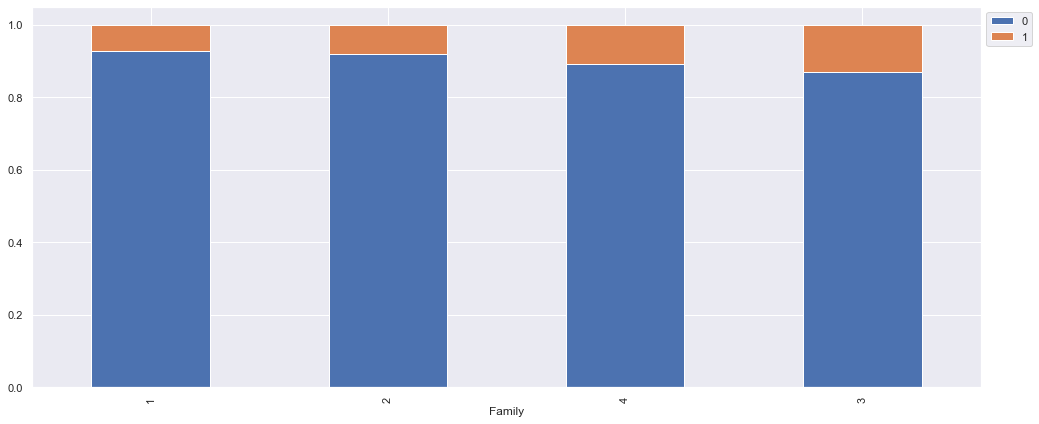

Personal_Loan     0    1   All  Percent_0  Percent_1
Education                                           
All            4520  480  5000  90.400000   9.600000
1              2003   93  2096  95.562977   4.437023
3              1296  205  1501  86.342438  13.657562
2              1221  182  1403  87.027798  12.972202
------------------------------------------------------------------------------------------------------------------------


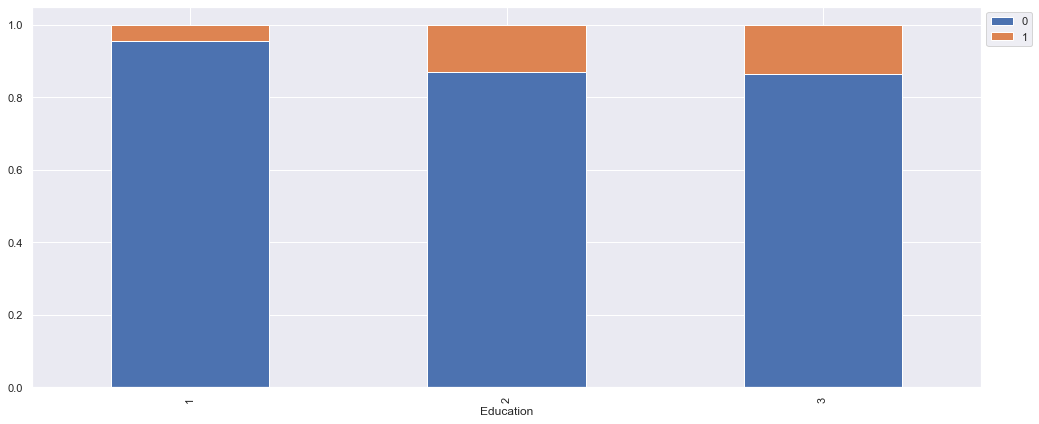

Personal_Loan          0    1   All  Percent_0  Percent_1
Securities_Account                                       
All                 4520  480  5000  90.400000   9.600000
0                   4058  420  4478  90.620813   9.379187
1                    462   60   522  88.505747  11.494253
------------------------------------------------------------------------------------------------------------------------


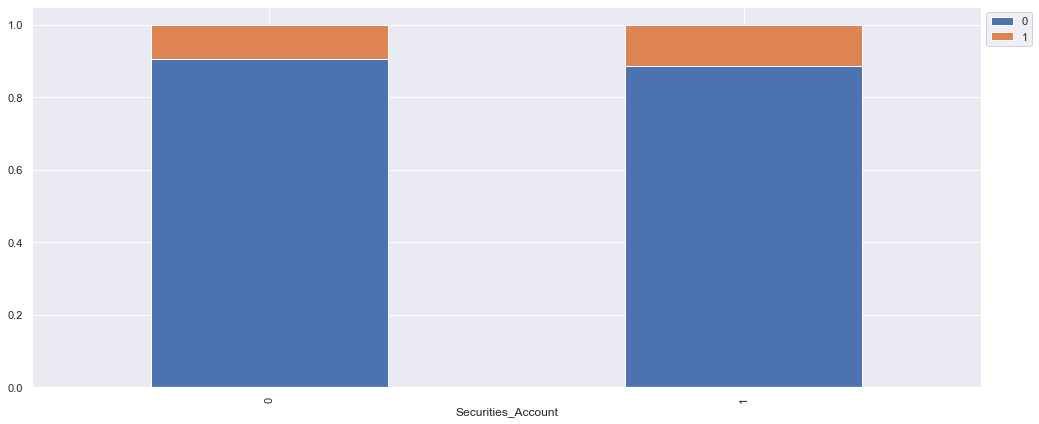

Personal_Loan     0    1   All  Percent_0  Percent_1
CD_Account                                          
All            4520  480  5000  90.400000   9.600000
0              4358  340  4698  92.762878   7.237122
1               162  140   302  53.642384  46.357616
------------------------------------------------------------------------------------------------------------------------


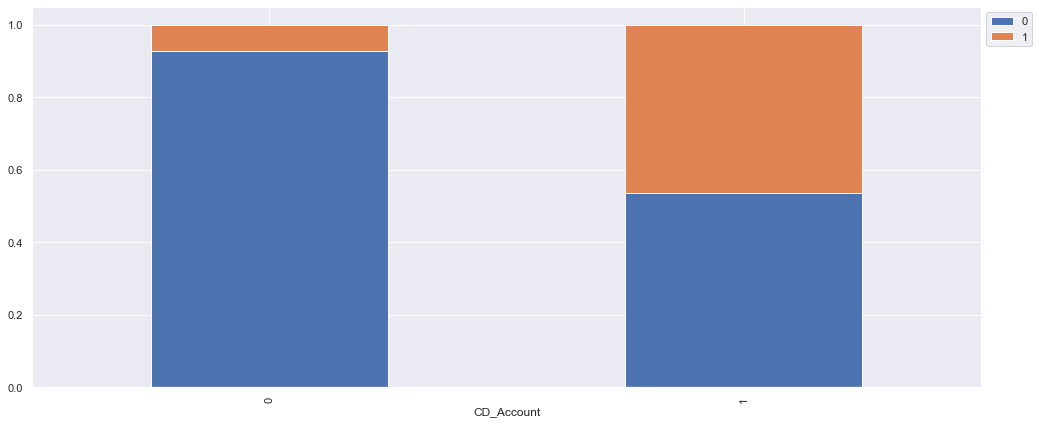

Personal_Loan     0    1   All  Percent_0  Percent_1
Online                                              
All            4520  480  5000  90.400000   9.600000
1              2693  291  2984  90.247989   9.752011
0              1827  189  2016  90.625000   9.375000
------------------------------------------------------------------------------------------------------------------------


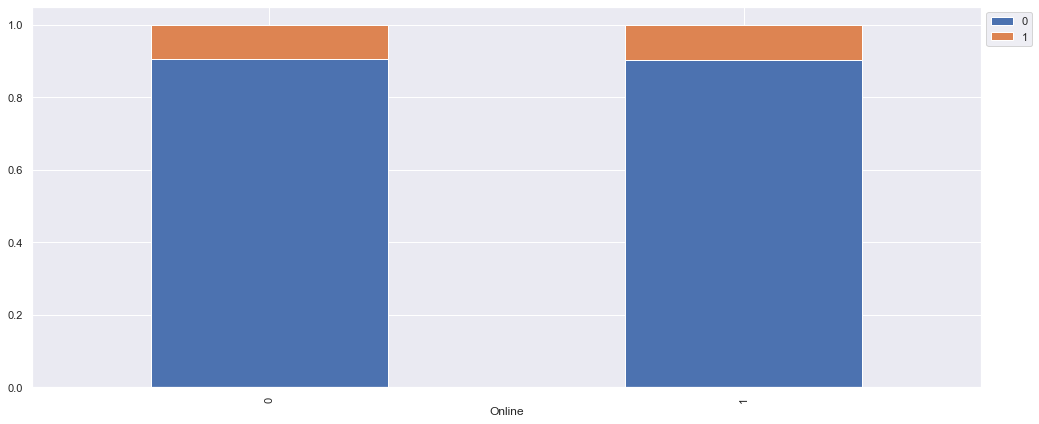

Personal_Loan     0    1   All  Percent_0  Percent_1
CreditCard                                          
All            4520  480  5000  90.400000   9.600000
0              3193  337  3530  90.453258   9.546742
1              1327  143  1470  90.272109   9.727891
------------------------------------------------------------------------------------------------------------------------


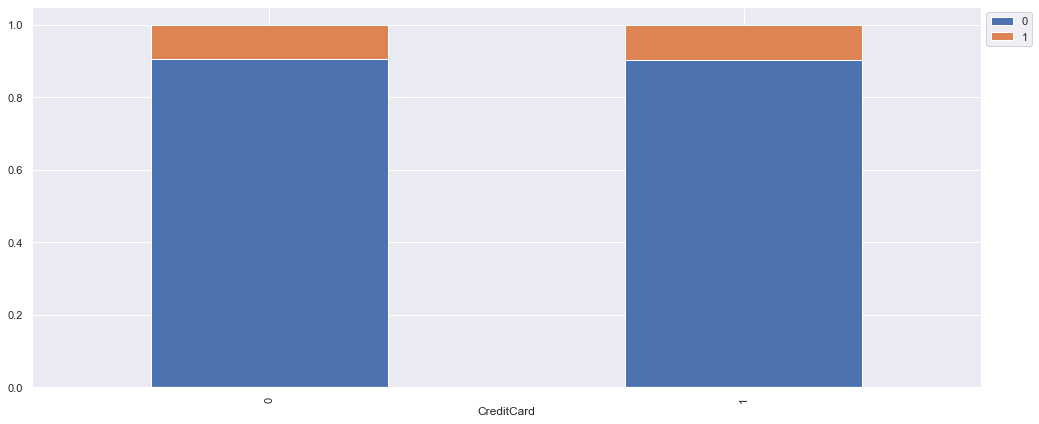

In [25]:
cols_to_plot = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

for col in cols_to_plot:
    stacked_plot(df[col])

Categorical Variable Observations:

* Family: It appears that customers with larger families are more likely to hold a personal loan.  
7.3% of singles, 8.2% of couples, 13.2% of families of 3 and 11.0% of familes of 4 hold a personal loan. The uplift is slight in the larger families but it is certainly there. 
* Education: Customers with higher education are more likely to hold a personal loan. 
4.4% of education level 1, 13.0% of education level 2 and 13.7% of education level 3 customers hold a personal loan. So there is more than a 3 fold increase in the likelyhood of a customer holding a personal loan if they are of education level 2 or 3 compared to level one. The bank should target its marketing towards people with a higher education level.
* Securities Account: There is little change in the likelyhood of holding a personal loan for customers with or without a securties account.
9.4% of customers without a securities account and 11.5% of customers with a securities account have a personal loan.    
So customers with a securities account are slightly more likely to hold a personal loan, but this is not large factor contributing to our target variable.  
* CD Account: Customers who hold a CD Account are much more likely to hold a personal loan.
7.2% of customers without a CD Account and 46.4% of customers with a CD Account have a personal loan. Customers with a CD Account are far more likley to have a personal loan. Of all the categorical variables, this one shows the largest difference. The bank should target its marketing towards customers who hold a CD Account.
* Online: There was very little difference in the target variable for customers who use or do not use online banking services.
9.8% of customers who do not use online banking and 9.4% of of customers who do use online banking have a personal loan. So there is almost no difference here.
* Credit Card: There is very little difference in the target variable for customers who have or do not have a credit card with another bank.
9.5% of customers without and 9.7% of customers with a credit card with another bank have a personal loan.

So it seems that the greatest uplift occurs in customers with a CD Account, customers with the highest levels of education and customers with 3 or more family members. The bank should target these demographics for their next marketing campaign.





### Let us check which of these differences are statistically significant.

The Chi-Square test is a statistical method to determine if two categorical variables have a significant correlation between them.
  
**Null Hypothesis -** There is no association between the two variables.      
**Alternate Hypothesis -** There is an association between two variables.

In [26]:
cols_to_check = ['Family','Education','Securities_Account','CD_Account','Online','CreditCard']

for col in cols_to_check:
    crosstab = pd.crosstab(df[col],df['Personal_Loan'])  # Contingency table of region and smoker attributes

    Ho = col + " has no effect on Personal Loan"   # Stating the Null Hypothesis
    Ha = col + " has an effect on Personal Loan"   # Stating the Alternate Hypothesis

    chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

    if p_value < 0.05:  # Setting our significance level at 5%
        print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
    else:
        print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Family has an effect on Personal Loan as the p_value (0.0) < 0.05
Education has an effect on Personal Loan as the p_value (0.0) < 0.05
Securities_Account has no effect on Personal Loan as the p_value (0.141) > 0.05
CD_Account has an effect on Personal Loan as the p_value (0.0) < 0.05
Online has no effect on Personal Loan as the p_value (0.693) > 0.05
CreditCard has no effect on Personal Loan as the p_value (0.884) > 0.05


We can see our observations echoed in the Chi-Square tests. Family, Education and CD Account are our more important variables.

### Continuous and Categorical Combinations

There exists combinations of continuous and categorical variables that indicate a high probability of a customer having a personal loan. Below are two examples:

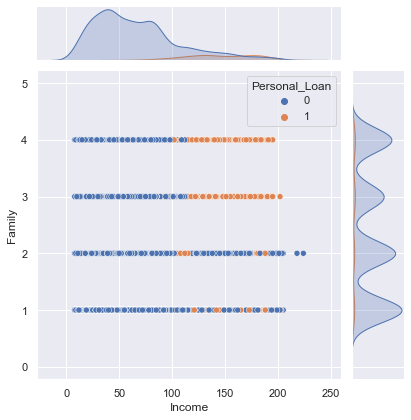

In [27]:
df['Family'] = df['Family'].astype('int64')
sns.jointplot(data=df, x='Income', y='Family', hue="Personal_Loan")

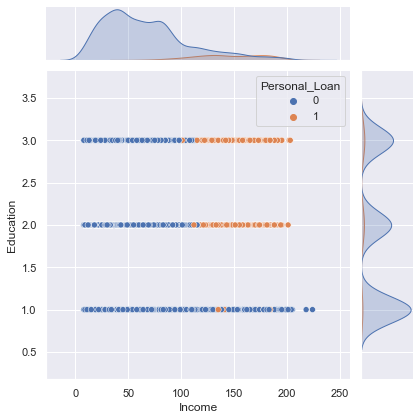

In [28]:
sns.jointplot(data=df, x='Income', y='Education', hue="Personal_Loan")

We have seen that high income, larger families and higher education all indicate a higher probability that a customer will have a personal loan. We can see that when we combine income with education, or family, there are areas of the plot that are very "pure". I.e. they contain only Personal Loan variable values of 1 or 0. This indicates that a decision tree model will be a good possible model to run to predict our target variable.

# Data Pre-processing

### Missing Values

We saw during our EDA that the Experience column contains some negative values. As far as I know, there is no such thing as negative years of experience, so these values should be treated.

In [29]:
df[df['Experience']<0] # First, let's look at the values below zero

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
89     25          -1     113    94303       4   2.30          3         0   
226    24          -1      39    94085       2   1.70          2         0   
315    24          -2      51    90630       3   0.30          3         0   
451    28          -2      48    94132       2   1.75          3        89   
524    24          -1      75    93014       4   0.20          1         0   
536    25          -1      43    92173       3   2.40          2       176   
540    25          -1     109    94010       4   2.30          3       314   
576    25          -1      48    92870       3   0.30          3         0   
583    24          -1      38    95045       2   1.70          2         0   
597    24          -2     125    92835       2   7.20          1         0   
649    25          -1      82    92677       4   2.10          3         0   
670    23          -1      61    92374       4   2.60          1       239   
686    24          -1      38    92612       4   0.60          2         0   
793    24          -2     150    94720       2   2.00          1         0   
889    24          -2      82    91103       2   1.60          3         0   
909    23          -1     149    91709       1   6.33          1       305   
1173   24          -1      35    94305       2   1.70          2         0   
1428   25          -1      21    94583       4   0.40          1        90   
1522   25          -1     101    94720       4   2.30          3       256   
1905   25          -1     112    92507       2   2.00          1       241   
2102   25          -1      81    92647       2   1.60          3         0   
2430   23          -1      73    92120       4   2.60          1         0   
2466   24          -2      80    94105       2   1.60          3         0   
2545   25          -1      39    94720       3   2.40          2         0   
2618   23          -3      55    92704       3   2.40          2       145   
2717   23          -2      45    95422       4   0.60          2         0   
2848   24          -1      78    94720       2   1.80          2         0   
2876   24          -2      80    91107       2   1.60          3       238   
2962   23          -2      81    91711       2   1.80          2         0   
2980   25          -1      53    94305       3   2.40          2         0   
3076   29          -1      62    92672       2   1.75          3         0   
3130   23          -2      82    92152       2   1.80          2         0   
3157   23          -1      13    94720       4   1.00          1        84   
3279   26          -1      44    94901       1   2.00          2         0   
3284   25          -1     101    95819       4   2.10          3         0   
3292   25          -1      13    95616       4   0.40          1         0   
3394   25          -1     113    90089       4   2.10          3         0   
3425   23          -1      12    91605       4   1.00          1        90   
3626   24          -3      28    90089       4   1.00          3         0   
3796   24          -2      50    94920       3   2.40          2         0   
3824   23          -1      12    95064       4   1.00          1         0   
3887   24          -2     118    92634       2   7.20          1         0   
3946   25          -1      40    93117       3   2.40          2         0   
4015   25          -1     139    93106       2   2.00          1         0   
4088   29          -1      71    94801       2   1.75          3         0   
4116   24          -2     135    90065       2   7.20          1         0   
4285   23          -3     149    93555       2   7.20          1         0   
4411   23          -2      75    90291       2   1.80          2         0   
4481   25          -2      35    95045       4   1.00          3         0   
4514   24          -3      41    91768       4   1.00          3         0   
4582   25          -1      6

There are no patterns that jump out in the data above. Now let's count how many rows have Experience < 0

In [30]:
df[df['Experience']<0].shape

(52, 13)

There are 52 Experience values less than zero. Given our data set have 5000 rows, the odd values represent just 1.04% or our data. We could just replace the values that are less than zero with zero. However, we can easily do better than that.


We know that Experience is near-perfectly correlated with age. We can take a look at the graph below to prove this to ourselves.

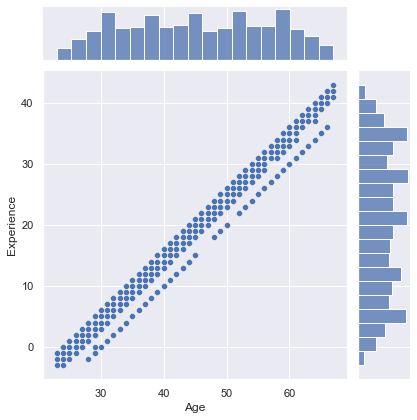

In [31]:
sns.jointplot(data=df, x='Age', y="Experience");

We can can easily eyeball an accurate linear fit to the above graph. We can see that the gradient of the line is equal to 1 and we know that the minimum Age = 23. So the equation of the line is:  
Experience = Age - 23
However, we can see that the relationship does not perfectly follow this line, there are a number of parallel lines, with different intercepts. I'm going to first use an intercept of -25 (Experience = Age - 25)as I feel this is more towards the middle. There will be some negative values left over (where age is below 25). After that I will use the Experience = Age - 23 line to fill the rest.  
So let's fill the < 0 values using our linear equations. Keep in mind that we will almost certainly drop the experience column given the very high level of multicollinearity between Age and Experience.

In [32]:
for i in range(0,4999):
    if df.iloc[i,1] < 0.0:    # If the value in the Experience column is < 0
        df.iloc[i,1] = df.iloc[i,0] - 25   # Replace the value using Age - 25

In [33]:
df[df['Experience']<0] # There are still values less than zero when age is less than 25

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
226    24          -1      39    94085       2   1.70          2         0   
315    24          -1      51    90630       3   0.30          3         0   
524    24          -1      75    93014       4   0.20          1         0   
583    24          -1      38    95045       2   1.70          2         0   
597    24          -1     125    92835       2   7.20          1         0   
670    23          -2      61    92374       4   2.60          1       239   
686    24          -1      38    92612       4   0.60          2         0   
793    24          -1     150    94720       2   2.00          1         0   
889    24          -1      82    91103       2   1.60          3         0   
909    23          -2     149    91709       1   6.33          1       305   
1173   24          -1      35    94305       2   1.70          2         0   
2430   23          -2      73    92120       4   2.60          1         0   
2466   24          -1      80    94105       2   1.60          3         0   
2618   23          -2      55    92704       3   2.40          2       145   
2717   23          -2      45    95422       4   0.60          2         0   
2848   24          -1      78    94720       2   1.80          2         0   
2876   24          -1      80    91107       2   1.60          3       238   
2962   23          -2      81    91711       2   1.80          2         0   
3130   23          -2      82    92152       2   1.80          2         0   
3157   23          -2      13    94720       4   1.00          1        84   
3425   23          -2      12    91605       4   1.00          1        90   
3626   24          -1      28    90089       4   1.00          3         0   
3796   24          -1      50    94920       3   2.40          2         0   
3824   23          -2      12    95064       4   1.00          1         0   
3887   24          -1     118    92634       2   7.20          1         0   
4116   24          -1     135    90065       2   7.20          1         0   
4285   23          -2     149    93555       2   7.20          1         0   
4411   23          -2      75    90291       2   1.80          2         0   
4514   24          -1      41    91768       4   1.00          3         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
226               0                   0           0       0           0  
315               0                   0           0       1           0  
524               0                   0           0       1           0  
583               0                   0           0       1           0  
597               0                   1           0       0           1  
670               0                   0           0       1           0  
686               0                   0           0       1           0  
793               0                   0           0       1           0  
889               0                   0           0       1           1  
909               0                   0           0       0           1  
1173              0                   0           0       0           0  
2430              0                   0           0       1           0  
2466              0                   0           0       1           0  
2618              0                   0           0       1           0  
2717              0                   0           0       1           1  
2848              0                   0           0       0           0  
2876              0                   0           0       0           0  
2962              0                   0           0       0           0  
3130              0                   1           0       0           1  
3157              0                   0           0       1           0  
3425              0                   0           0       1           0  
3626              0                  

In [34]:
for i in range(0,4999):
    if df.iloc[i,1] < 0.0:    # If the value in the Experience column is < 0
        df.iloc[i,1] = df.iloc[i,0] - 23   # Replace the value using Age - 23

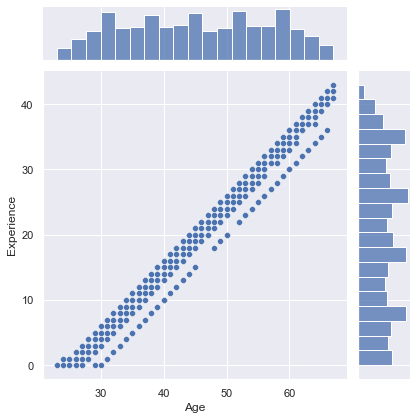

In [35]:
sns.jointplot(data=df, x='Age', y="Experience"); # And check our Age vs. Experience plot again

I feel that by using two lines, rather than just one, the final Age vs. Experience plot looks better. Again given that we treated 1.04% of values in a column that we will probably drop; this treatment of the odd values is likely more than sufficient.

### Treating skewness

We observed a number of skewed columns during our EDA. Let's see if we could treat the skewness with a log transform.

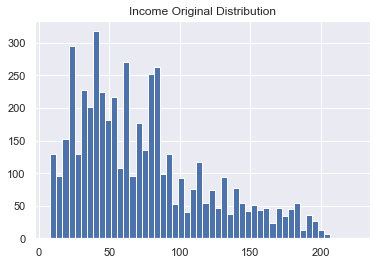

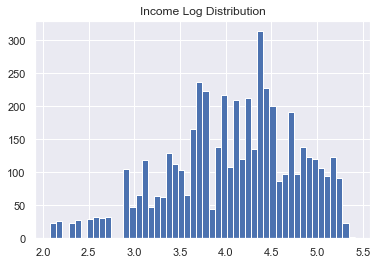

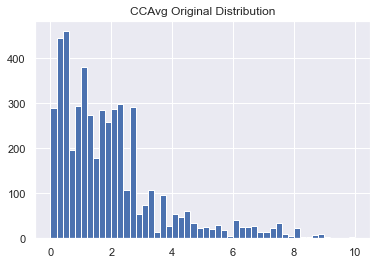

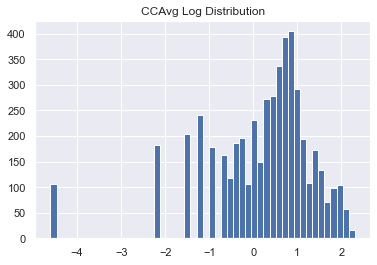

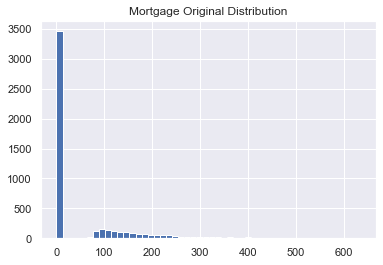

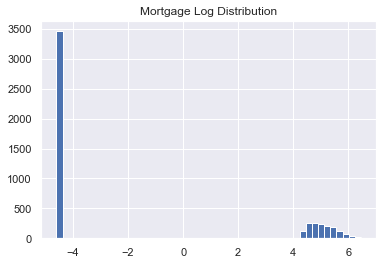

In [36]:
cols_to_log = ['Income', 'CCAvg', 'Mortgage']
for colname in cols_to_log:
    plt.hist(df[colname], bins=50) #plot before a log transform
    plt.title(f'{colname} Original Distribution')
    plt.show()
    plt.hist(np.log(df[colname]+0.01), bins=50) #plot after a log transform
    plt.title(f'{colname} Log Distribution')
    plt.show()

It doesn't appear that a log transform is useful for any of the columns tested above. After the log transform:  
* Income became left skewed, not really an improvement from our original right skew.
* CCAvg also just moved from being right skewed to being left skewed
* Mortgage saw a change of scale but no reall change in skewness.  

As a result, we will NOT apply a log transform to any of the data. However given that the scale of the Income column and Mortgage column is in the hundreds and the other columns have a much smaller scale, we will apply a min-max scalar to these columns.

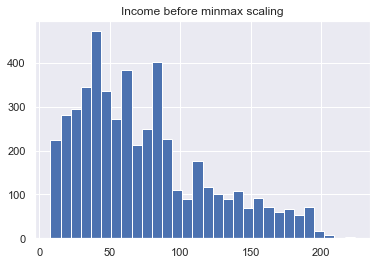

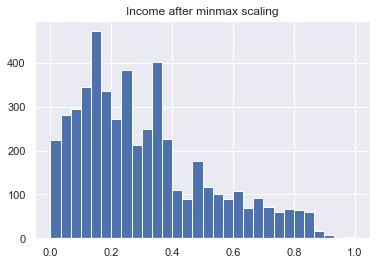

In [37]:
# replacing with scaled 
df['Income'].hist(bins=30)
plt.title('Income before minmax scaling')
plt.show()

df['Income_Scaled'] = MinMaxScaler().fit_transform(
    df[['Income']]
)

df['Income_Scaled'].hist(bins=30)
plt.title('Income after minmax scaling')
plt.show()

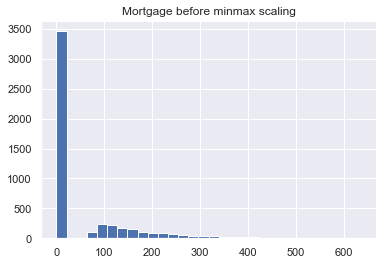

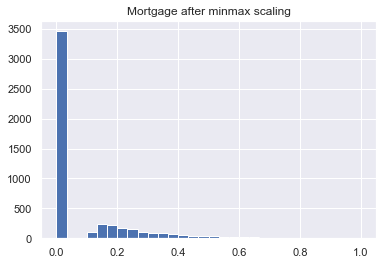

In [38]:
# replacing with scaled 
df['Mortgage'].hist(bins=30)
plt.title('Mortgage before minmax scaling')
plt.show()

df['Mortgage_Scaled'] = MinMaxScaler().fit_transform(
    df[['Mortgage']]
)

df['Mortgage_Scaled'].hist(bins=30)
plt.title('Mortgage after minmax scaling')
plt.show()

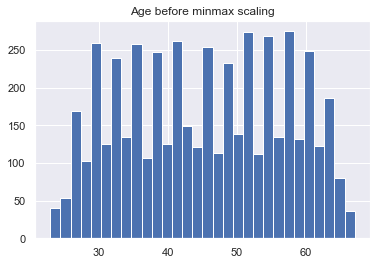

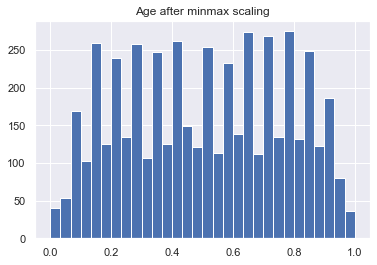

In [39]:
# replacing with scaled 
df['Age'].hist(bins=30)
plt.title('Age before minmax scaling')
plt.show()

df['Age_Scaled'] = MinMaxScaler().fit_transform(
    df[['Age']]
)

df['Age_Scaled'].hist(bins=30)
plt.title('Age after minmax scaling')
plt.show()

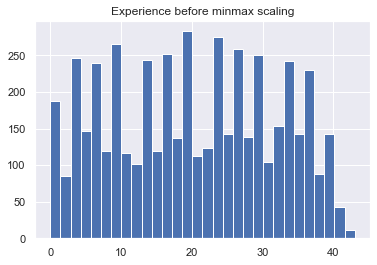

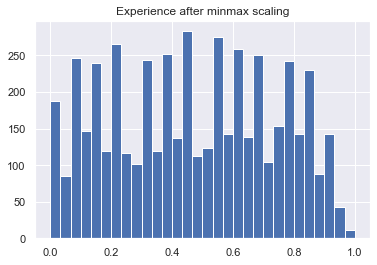

In [40]:
# replacing with scaled 
df['Experience'].hist(bins=30)
plt.title('Experience before minmax scaling')
plt.show()

df['Experience_Scaled'] = MinMaxScaler().fit_transform(
    df[['Experience']]
)

df['Experience_Scaled'].hist(bins=30)
plt.title('Experience after minmax scaling')
plt.show()

In [41]:
df.describe().T

count          mean          std      min           25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.000000   
Experience          5000.0     20.126200    11.429523      0.0     10.000000   
Income              5000.0     73.774200    46.033729      8.0     39.000000   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.000000   
Family              5000.0      2.396400     1.147663      1.0      1.000000   
CCAvg               5000.0      1.937938     1.747659      0.0      0.700000   
Education           5000.0      1.881000     0.839869      1.0      1.000000   
Mortgage            5000.0     56.498800   101.713802      0.0      0.000000   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.000000   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.000000   
CD_Account          5000.0      0.060400     0.238250      0.0      0.000000   
Online              5000.0      0.596800     0.490589      0.0      0.000000   
CreditCard          5000.0      0.294000     0.455637      0.0      0.000000   
Income_Scaled       5000.0      0.304510     0.213119      0.0      0.143519   
Mortgage_Scaled     5000.0      0.088974     0.160179      0.0      0.000000   
Age_Scaled          5000.0      0.507691     0.260526      0.0      0.272727   
Experience_Scaled   5000.0      0.468051     0.265803      0.0      0.232558   

                             50%           75%      max  
Age                    45.000000     55.000000     67.0  
Experience             20.000000     30.000000     43.0  
Income                 64.000000     98.000000    224.0  
ZIPCode             93437.000000  94608.000000  96651.0  
Family                  2.000000      3.000000      4.0  
CCAvg                   1.500000      2.500000     10.0  
Education               2.000000      3.000000      3.0  
Mortgage                0.000000    101.000000    635.0  
Personal_Loan           0.000000      0.000000      1.0  
Securities_Account      0.000000      0.000000      1.0  
CD_Account              0.000000      0.000000      1.0  
Online                  1.000000      1.000000      1.0  
CreditCard              0.000000      1.000000      1.0  
Income_Scaled           0.259259      0.416667      1.0  
Mortgage_Scaled         0.000000      0.159055      1.0  
Age_Scaled              0.500000      0.727273      1.0  
Experience_Scaled       0.465116      0.697674      1.0

We now have scaled versions for all our columns with large numbers. Logistic regression is sensitive to the scale of the variables. Given that most of the variables have a scale 0-1, it was worth scaling the variables that had values up to 224 or 635.  
We will test both the unscaled original variables and the scaled variables in the logistic regression and see which works best. For the decisions trees we can just use the original variables as decision trees are less sensitive to scale.

# --------------------------------------------------------------------------------------------------------------

# Logistic Regression

### Prep work
First of all, we will write some functions in order to score the models and to create a confusion matrix. Then we will test for multicollinearity in the data set and drop any columns we need to.

In [42]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [43]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Test for Multicollinearity

In this sub section I'm going to test for Multicollinearity. I will also set up a data frame for my first test.  
For the first model, I will test the metrics when I use the original columns. I will then create a model using the scaled versions of Income, Mortgage, Age, Experience and see which works better.

In [44]:
df_Original = df.copy() #Make a copy of the original data frame at this point
LogM1 = df.copy() #make another copy of the data frame called LogM1 for our first Logistic model

In [45]:
LogM1.head(2) # Let's look at the columns so that we can compare to below 

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   

   Income_Scaled  Mortgage_Scaled  Age_Scaled  Experience_Scaled  
0       0.189815              0.0    0.045455           0.023256  
1       0.120370              0.0    0.500000           0.441860

In [46]:
# First test, drop all scaled variables and use the original variables 
# We will also drop ZIPCode as it is a categorical variable with too many values to deal with
cols_to_drop = ['ZIPCode','Income_Scaled', 'Mortgage_Scaled', 'Age_Scaled', 'Experience_Scaled']

LogM1.drop(cols_to_drop, axis=1, inplace=True)
    
LogM1.head(2) #This is just to check I've dropped all the columns I need to. I'm comparing to the data frame just above.

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0

Now perform the actual test for multicollinearity

In [47]:
y = LogM1['Personal_Loan']  # I'm splitting out the target variable before testing. I'm not sure this is technically necessary
X = LogM1.drop('Personal_Loan', axis=1)

In [48]:
# to compute VIF, we first have to add a constant column having value 1 to our input variables

X1 = X.copy()   #Copy our X data frame for the purpose of this test
X1['const'] = 1  #Add a constant column

In [49]:
# Here we will be using our library: from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)
print('VIF Scores: \n\n{}\n'.format(vif_series1))

VIF Scores: 

Age                    92.751527
Experience             92.651262
Income                  1.858510
Family                  1.033874
CCAvg                   1.728047
Education               1.110024
Mortgage                1.051271
Securities_Account      1.137082
CD_Account              1.329507
Online                  1.039589
CreditCard              1.107887
const                 446.933907
dtype: float64



As we expected, Age and Experience have high multicollinearity so we need to drop one of them. I'm going to drop Experience as this had some odd values in the beginning.

In [50]:
X.drop('Experience', axis=1, inplace=True)
X.head(2)

Age  Income  Family  CCAvg  Education  Mortgage  Securities_Account  \
0   25      49       4    1.6          1         0                   1   
1   45      34       3    1.5          1         0                   1   

   CD_Account  Online  CreditCard  
0           0       0           0  
1           0       0           0

# Logistic Regression

### Build the First Logistic Regression Model

The first model that we will build will drop the columns that were min-max-scaled an use the original columns.  
The data frame was built in the previous subsection. Here we will split the data, test the split and then build the first model.

In [51]:
# Let's split the data into a train and test sets. 
# Note that I'm using a random state of 1. I will use this for all splits so that I only have to test the split once.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train.head()

Age  Income  Family  CCAvg  Education  Mortgage  Securities_Account  \
1334   47      35       2    1.3          1         0                   0   
4768   38      39       1    2.0          2         0                   0   
65     59     131       1    3.8          1         0                   0   
177    29      65       4    1.8          2       244                   0   
4489   39      21       3    0.2          2         0                   0   

      CD_Account  Online  CreditCard  
1334           0       1           0  
4768           0       1           0  
65             0       1           1  
177            0       0           0  
4489           0       1           0

#### Test Data Split

In [52]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [53]:
print("Original Personal_Loan 1 Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal_Loan'] == 1]), (len(df.loc[df['Personal_Loan'] == 1])/len(df.index)) * 100))
print("Original Personal_Loan 0 Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal_Loan'] == 0]), (len(df.loc[df['Personal_Loan'] == 0])/len(df.index)) * 100))
print("")
print("Training Personal_Loan 1 Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal_Loan 0 Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal_Loan 1 Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal_Loan 0 Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal_Loan 1 Values    : 480 (9.60%)
Original Personal_Loan 0 Values   : 4520 (90.40%)

Training Personal_Loan 1 Values    : 331 (9.46%)
Training Personal_Loan 0 Values   : 3169 (90.54%)

Test Personal_Loan 1 Values        : 149 (9.93%)
Test Personal_Loan 0 Values       : 1351 (90.07%)



The split between Personal_Loan = 1 and Personal_Loan = 0 is fairly even between the Original, Train and Test data sets. This is what we are after. If we keep the random state = 1 when peforming our train_test_split command for future models, we expect the same split and hence the same proportions of Personal_Loan True/False.  

Note that there is approximately 90% of customers who do not have a personal loan. If we just created a model that always predicted 0, we would get an accuracy of 90%. Given this we expect to see accuracy scores above 90% in our models.

### Now create the model and test it

In [54]:
model = LogisticRegression(random_state=1)
lg = model.fit(X_train,y_train)

Accuracy on training set :  0.9445714285714286
Accuracy on test set :  0.94
Recall on training set :  0.540785498489426
Recall on test set :  0.47651006711409394
Precision on training set :  0.8099547511312217
Precision on test set :  0.8554216867469879
F1 on training set :  0.6485507246376812
F1 on test set :  0.6120689655172412


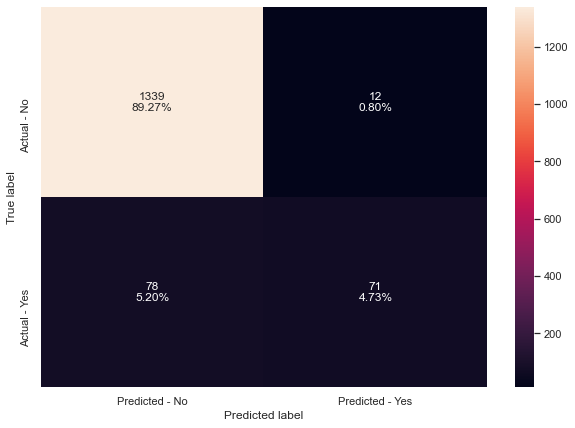

In [55]:
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,flag=True)
# creating confusion matrix
make_confusion_matrix(lg,X_test,y_test)

We can see that the metrics are close between the train and test set. A good sign that the model is not overfitting. Comments on the metrics will come after the second logistic model test.

# Logistic Regression

### Build the Second Logistic Regression Model

This time we will drop the original Age, income and Mortgage columns and use the min-max-scaled versions of these columns in their place.  
We already know that Experience is collinear with Age, so we will drop both the scaled and unscaled versions of these columns.  Finally, we have already checked the data split using random_state=1 so we will not need to test the data split again.

In [56]:
LogM2 = df.copy() # Copy the orginal data frame to a data frame we will manipulate for the model
LogM2.head(2) # check the columns

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   

   Income_Scaled  Mortgage_Scaled  Age_Scaled  Experience_Scaled  
0       0.189815              0.0    0.045455           0.023256  
1       0.120370              0.0    0.500000           0.441860

In [57]:
# This time drop the unscaled variables ALSO drop experience in both versions as we know it is collinear with Age
cols_to_drop = ['ZIPCode','Income', 'Mortgage', 'Age', 'Experience','Experience_Scaled']

LogM2.drop(cols_to_drop, axis=1, inplace=True)
    
LogM2.head(2) #Checking the dropped columns and comparing the data frame to the one just above.

Family  CCAvg  Education  Personal_Loan  Securities_Account  CD_Account  \
0       4    1.6          1              0                   1           0   
1       3    1.5          1              0                   1           0   

   Online  CreditCard  Income_Scaled  Mortgage_Scaled  Age_Scaled  
0       0           0       0.189815              0.0    0.045455  
1       0           0       0.120370              0.0    0.500000

In [58]:
y = LogM2['Personal_Loan']   # Split the data into dependent and independent variables
X = LogM2.drop('Personal_Loan', axis=1)

In [59]:
# Let's split the data into a train and test sets. 
# Note that I'm using a random state of 1. I know the split is good so I won't test it again here.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train.head()

Family  CCAvg  Education  Securities_Account  CD_Account  Online  \
1334       2    1.3          1                   0           0       1   
4768       1    2.0          2                   0           0       1   
65         1    3.8          1                   0           0       1   
177        4    1.8          2                   0           0       0   
4489       3    0.2          2                   0           0       1   

      CreditCard  Income_Scaled  Mortgage_Scaled  Age_Scaled  
1334           0       0.125000         0.000000    0.545455  
4768           0       0.143519         0.000000    0.340909  
65             1       0.569444         0.000000    0.818182  
177            0       0.263889         0.384252    0.136364  
4489           0       0.060185         0.000000    0.363636

In [60]:
model = LogisticRegression(random_state=1)  # Here we create the model and fit it to the training data
lg = model.fit(X_train,y_train)

Accuracy on training set :  0.9514285714285714
Accuracy on test set :  0.9473333333333334
Recall on training set :  0.5861027190332326
Recall on test set :  0.5503355704697986
Precision on training set :  0.8546255506607929
Precision on test set :  0.8723404255319149
F1 on training set :  0.6953405017921146
F1 on test set :  0.6748971193415638


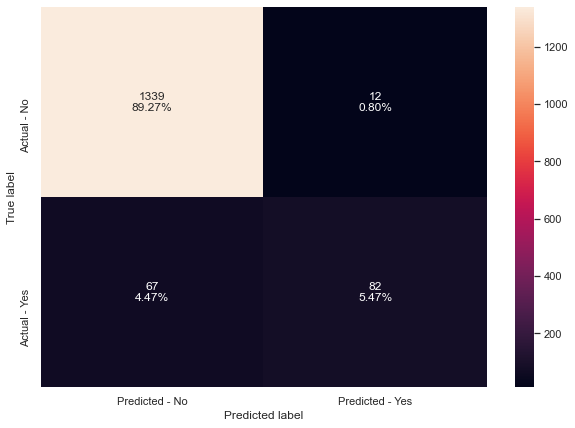

In [61]:
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,flag=True)
# creating confusion matrix
make_confusion_matrix(lg,X_test,y_test)

Again the train and test metrics are similar, showing that we are not overfitting the model.  
All of our metrics have increased in both the training and test data as a result of using the scaled version of the Income, Mortgage and Age columns. We can therefor conclude that our outlier treatment of these columns should be kept.

# Logistic Regression
### Model Performace Evaluation and Improvement

We saw that by conditioning our input variables, all of our metrics could be improved. However, what metric would be the best one to optimise the banks future marketing campaign in this case?

The model can make wrong predictions when:
* 1) Predicting a customer holds a personal loan when they do not (False Positive). In this case the marketing team will target a demographic that is unlikely to open a personal loan. This wastes marketing dollars.
* 2) Predicting a customer does not hold a personal loan when they do (False Negative). In this case the marketing team will miss a demographic that is likely to open a personal loan. This is a wasted opportunity.  

Given that the profit of a customer opening a personal loan is likely higher than the cost of marketing to people who are unlikely to open a home loan, it's slightly more costly to predict a customer does not hold a personal loan when they do, i.e. a false negative, so recall is an important metric. However, it is wasteful to market to a large number of people who are unlikely to open a personal loan. So precision also needs to be high. For this reason we will try to maximise the F1 Score. In cases where we have two models with a high F1 score, preference will be given to the model with the higher recall.  

While accuracy is not a metric we are trying to maximise; we know that our baseline accuracy is about 90% i.e. we could predict all customers as not having a personal loan and achieve 90% accuracy. Our current model is at ~95% accuracy on the train and test sets. So we are at least doing better than the base line.  

Our current best metrics are:  
* Recall = 0.59 Train, 0.55 Test
* F1 Score = 0.70 Train, 0.67 Test  

Let's see if we can optimize the model threshold and improve these metrics.

#### Optimize threshold using ROC Curve

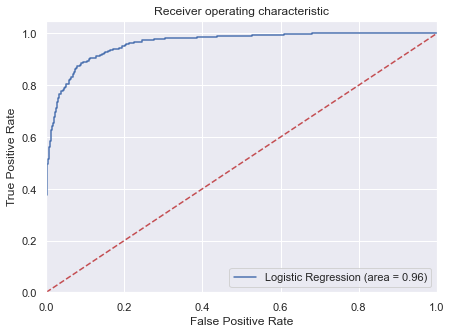

In [62]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [63]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.08106106403396776


Our optimum threshold is 0.08. This seems extremely low to me but we will run the model using this threshold and see what we get.

In [64]:
# Model prediction with optimal threshold

pred_train_opt = (lg.predict_proba(X_train)[:,1]>optimal_threshold)
pred_test_opt = (lg.predict_proba(X_test)[:,1]>optimal_threshold)

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt) )
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('F1 Score on train data:',f1_score(y_train, pred_train_opt) )
print('F1 Score on test data:',f1_score(y_test, pred_test_opt))

Accuracy on train data: 0.8662857142857143
Accuracy on test data: 0.8733333333333333
Recall on train data: 0.918429003021148
Recall on test data: 0.9060402684563759
Precision on train data: 0.4080536912751678
Precision on test data: 0.4340836012861736
F1 Score on train data: 0.5650557620817843
F1 Score on test data: 0.5869565217391305


Text(0.5, 39.5, 'Predicted label')

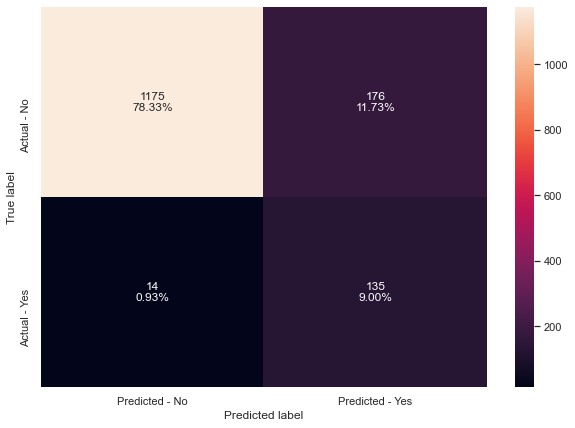

In [65]:
# Create a confusion matrix for the model using the optimal threshold from the ROC curve
y_predict = lg.predict_proba(X_test)[:,1]>optimal_threshold
cm=metrics.confusion_matrix( y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=labels,fmt='')
plt.ylabel('True label')
plt.xlabel('Predicted label')

When we use the ROC Curve optimum threshold the following changes occur to the metrics of our test data:  
* Accuracy decreases on test data from 94.73% to 87.33% - down 7.4%
* Recall increases on test data from 55.03% to 90.60% - up 35.57%
* Precision decreases on test data from 87.23% to 43.41% - down 35.57%
* F1 Score decreases on test data from 67.49 to 58.70% - down 8.79%

Looking at the metrics that we care most about: We can see that there is a massive increase in our recall score for a moderate reduction in our F1 score. We could certainly use this model/threshold combination if the bank wants to market to as many people as possible who are likely to open a personal loan. The trade-off is that they would market to more people who are unlikley to open a personal loan. 

We should use this model/threshold combination if the cost of marketing is much less than the gain of a customer opening a personal loan.  

Another interesting note about this threshold: The accuarcy of the model is less than our baseline accuracy of 90% (The accuracy we would get if we just predicted everyone does not have a personal loan). This just goes to show that accuracy is not the best measure for all functions of a model. In this case there are many more false postives - which might be ok if the cost of marketing is small compared to the gain of more customers opening a personal loan.

#### Optimize threshold using Precision-Recall Curve

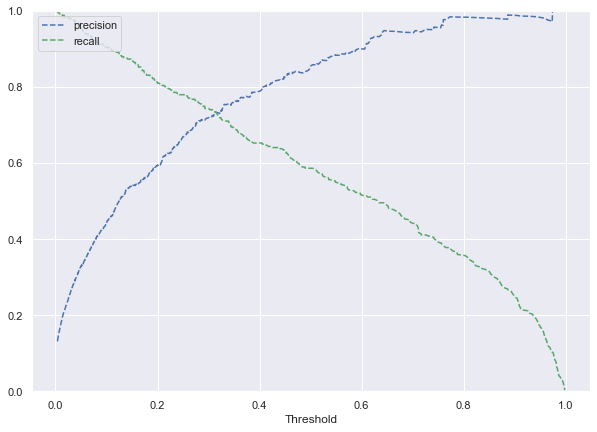

In [66]:
y_scores=lg.predict_proba(X_train)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

The precision recall curves intersect when the threshold is 0.366. Let's try this threshold and see if we can maximize our F1 score.

In [67]:
optimal_threshold = 0.366

# Model prediction with optimal threshold
pred_train_opt = (lg.predict_proba(X_train)[:,1]>optimal_threshold)
pred_test_opt = (lg.predict_proba(X_test)[:,1]>optimal_threshold)

#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('F1 Score on train data:',f1_score(y_train, pred_train_opt) )
print('F1 Score on test data:',f1_score(y_test, pred_test_opt))

Accuracy on train data: 0.9502857142857143
Accuracy on test data: 0.9466666666666667
Recall on train data: 0.6737160120845922
Recall on test data: 0.6308724832214765
Precision on train data: 0.7716262975778547
Precision on test data: 0.7899159663865546
F1 Score on train data: 0.7193548387096775
F1 Score on test data: 0.7014925373134328


Text(0.5, 39.5, 'Predicted label')

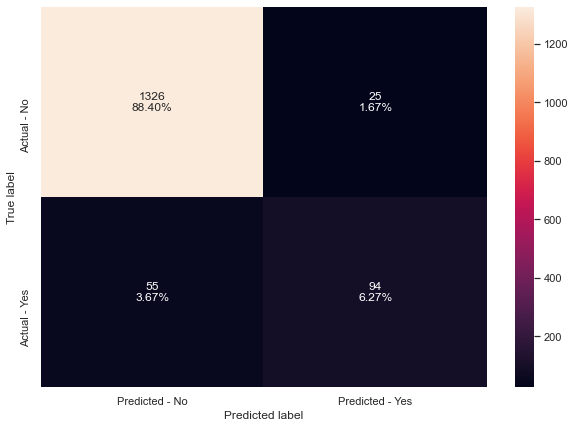

In [68]:
# Create a confusion matrix for the optimal threshold from precision-recall plot
y_predict = lg.predict_proba(X_test)[:,1]>optimal_threshold
cm=metrics.confusion_matrix( y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=labels,fmt='')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [69]:
#Let's create a comparison frame to better compare the metrics above with the models
comparison_frame = pd.DataFrame({'Model':['Original Inputs',
                                          'Conditioned Inputs', 
                                          'ROC Optimal threshold = 0.081',
                                          'Precision-Recall threshold = 0.366'], 
                                 'Test_Accuracy':[94.00,94.73,87.33,94.67],
                                 'Test Precision':[85.54,87.23,43.41,78.99],
                                 'Test Recall':[47.65,55.03,90.60,63.09], 
                                 'Test F1':[61.21,67.49,58.69,70.15]                                 
                                }) 

comparison_frame

Model  Test_Accuracy  Test Precision  \
0                     Original Inputs          94.00           85.54   
1                  Conditioned Inputs          94.73           87.23   
2       ROC Optimal threshold = 0.081          87.33           43.41   
3  Precision-Recall threshold = 0.366          94.67           78.99   

   Test Recall  Test F1  
0        47.65    61.21  
1        55.03    67.49  
2        90.60    58.69  
3        63.09    70.15

The table above summarizes the models/thresholds that we have tried. We saw that by scaling our inputs we were able to get better results in all of our metrics. We used the scaled inputs in all the subsequent models. From there, we looked at two methods of optimizing the model threshold. Remember that we are attempting to optimize recall and F1 score. The threshold from the ROC curve gives a very high recall score for a moderate drop in the F1 score. The threshold from the precision-recall plot optimizes the F1 score. It is also worth noting that the recall is higher using the 0.366 threshold than when we used the default. So the 0.366 threshold gives a resonable recall and a high F1 score.  

The bank could use the threshold from the ROC curve if they are interested in maximizing recall. This would be the case if the cost of marketing is less than the oportunity cost of a customer, who might have taken a personal loan, not being targeted for personal loan marketing.  
If the bank is interested in only marketing to people who are likely to open a personal loan, they are looking for the highest precision score. In which case the the default threshold on the conditoned model is the best option.  
Finally, if the bank is looking to balance the cost of marketing with the opportunity cost of missing potential customers. Then they want to maximize the F1 score. In which case the threshold from the Precision-Recall Curve is the best option.

### Logistic Regression Model Coefficients

With the exception of our original model, without our condtioned inputs, the logistic regression model has been the same throughout, we have simply changed the threshold. So we only need to look at one set of coefficients.

In [70]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=['coef']).T

Family     CCAvg  Education  Securities_Account  CD_Account    Online  \
coef  0.57397  0.244835   1.372693           -0.898501     3.10229 -0.488577   

      CreditCard  Income_Scaled  Mortgage_Scaled  Age_Scaled  
coef   -0.914251       8.413423         0.593234    0.130876

The feature with the largest impact on predicting if a customer has a personal loan is Income. This is clear as the coefficient for income_scaled is much larger than any other variable. We also saw in our EDA that higher income was a strong predictor of our personal loan ownership.  
Another large indicator of a customer owning a personal loan is CD_Account. We saw in our EDA that 46% of customers with a CD Account also has a personal loan. Compare this to only 7% of customers without a CD Account owning a personal loan. We can see our observations from the EDA reflected in the model coefficients.  
We also observed in our EDA that customers with larger families and higher educations were more likely to have a personal loan. Again we see that reflected in the positive coefficients.  
We observe negative coefficients in Securities_Account, Online and CreditCard. We saw in our EDA that there was little change in personal loan ownership if these variables were 0 or 1. The model predicts a slight decrease in the chances a customer will have a personal loan if they: Use online AllLife's online services, own a credit card with another bank, or have a securities account.

### Convert coefficients to Odds
**Odds:**
* When coefficient is b , then change in odds is (exp(b)-1)*100 %
* Probability = odd/(1+odd)

In [71]:
change_odds = (np.exp(np.abs(lg.coef_[0]))-1)*100
pd.set_option('display.max_rows',None)
pd.DataFrame(change_odds, X_train.columns, columns=['odds']).T

Family     CCAvg   Education  Securities_Account   CD_Account  \
odds  77.530164  27.74102  294.596197          145.591967  2124.884184   

         Online  CreditCard  Income_Scaled  Mortgage_Scaled  Age_Scaled  
odds  62.999559  149.490474   450616.02438        80.983253   13.982645

One downside of min-max scaling our input variables is that it makes the odd's much harder to interpet. For instance if we were to take the values in the table above literally, a 1 unit increase in income increase the odds of a customer having a personal loan by 450616%. Of course, an increase of one unit means going from our min (zero income) to our max $224k. 
It is my opinion that the scaled variables makes the conversion of the coefficients to odds somewhat meaningless. It is unlikely that a customer using online banking reduces the odds of them having a personal loan by 63\%. As a result, the coefficients converted to odds do not tell us anything new. We can still see that customers with higher educations, higher incomes and who have a CD Account are the most likely to have a personal loan by the magnitude of the "odds" but we can infer real values from them. However, given that the goal is to create the best model for the bank to use, I think that the trade off is acceptable.

# --------------------------------------------------------------------------------------------------------------

# Decision Tree 
### Initial Model Building

For the first decision tree model we will use the unscaled variables as decision trees handle outliers better than regresion models. We will also input the ZIP Code as decision trees are very good at finding patterns, perhaps there is a pattern in the ZIP Codes that will inprove the predictive power of the decision tree model.


**Note:**
Behind the scenes I tested an initial (unpruned) decision tree model using the scaled data with and without the ZIP Code. It's hard to really judge the success of unpruned models as they overfit badly, however the metrics of the test data were slighltly better with the variable inputs listed above i.e. the original inputs.

**Note 2:**
I'm still going to drop experience because it is so collinear with age. We don't technically have to do this for a decision tree model but: less inputs make model outputs easier to understand and Experience is pretty much just age -25, and a fairly useless column in my opinion.

In [72]:
dTreeM1 = df.copy() # Copy the orginal data frame to a data frame we will manipulate for the model
dTreeM1.head(2) # check the columns

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   

   Income_Scaled  Mortgage_Scaled  Age_Scaled  Experience_Scaled  
0       0.189815              0.0    0.045455           0.023256  
1       0.120370              0.0    0.500000           0.441860

In [73]:
# For the model, drop all scaled variables and use the original variables. We will also drop Experience.
# We will keep ZIP Code and see if it actually helps
cols_to_drop = ['Experience', 'Income_Scaled', 'Mortgage_Scaled', 'Age_Scaled', 'Experience_Scaled']

dTreeM1.drop(cols_to_drop, axis=1, inplace=True)
    
dTreeM1.head(2) #This is just to check I've dropped all the columns I need to. I'm comparing to the data frame just above.

Age  Income  ZIPCode  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25      49    91107       4    1.6          1         0              0   
1   45      34    90089       3    1.5          1         0              0   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0

In [74]:
y = dTreeM1['Personal_Loan']   # Split the data into dependent and independent variables
X = dTreeM1.drop('Personal_Loan', axis=1)

In [75]:
# Let's split the data into a train and test sets. 
# Note that I'm using a random state of 1. I know the split is good so I won't test it again here.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train.head() # the index looks random so the split has worked

Age  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
1334   47      35    94304       2    1.3          1         0   
4768   38      39    93118       1    2.0          2         0   
65     59     131    91360       1    3.8          1         0   
177    29      65    94132       4    1.8          2       244   
4489   39      21    95518       3    0.2          2         0   

      Securities_Account  CD_Account  Online  CreditCard  
1334                   0           0       1           0  
4768                   0           0       1           0  
65                     0           0       1           1  
177                    0           0       0           0  
4489                   0           0       1           0

In [76]:
# initialize the DecisionTreeClassifier. We don't need any special hyperparameters just yet.
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1) 
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

#### Unpruned Tree metrics

In [77]:
scores = get_metrics_score(dTree,X_train,X_test,y_train,y_test,flag=True)

Accuracy on training set :  1.0
Accuracy on test set :  0.98
Recall on training set :  1.0
Recall on test set :  0.8859060402684564
Precision on training set :  1.0
Precision on test set :  0.9103448275862069
F1 on training set :  1.0
F1 on test set :  0.8979591836734694


The accuracy on the training data is 1, there is also quite a difference between the train and test metrics for all metrics (apart from accuracy). This indicates that the model is overfit. This is expected. Decision trees, if left unpruned will always overfit the training data. We will check the feature importances and try to visuallize the tree. Then we will start pruning the model.

#### Unpruned Tree Feature Imporances

In [78]:
# importance of features in the tree building ( The importance of a feature is computed as the 
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.401465
Income              0.308336
Family              0.164664
CCAvg               0.045263
Age                 0.044438
CD_Account          0.025711
Mortgage            0.009561
Online              0.000561
ZIPCode             0.000000
Securities_Account  0.000000
CreditCard          0.000000


* After our EDA there are few surprises in the above list of feature importances. We saw that education-income and income-family combinations created very pure areas on the plots. It is no surprise that we see these features at the top of the list.  
* Given that such a large proportion of customers with a CD Account also had a personal loan it is surprising that CD Account is not of higher inportance. On the other hand, only about 6% of customers have a CD Account, so this likely pushes the importance of this variable down the list.  
* At the bottom of the list are ZIPCode, Securities Account and Credit Card. Again, no surprises here, we saw in our EDA that there was very little relationship between these variables and the target variable.

#### Unpruned Tree Visualization

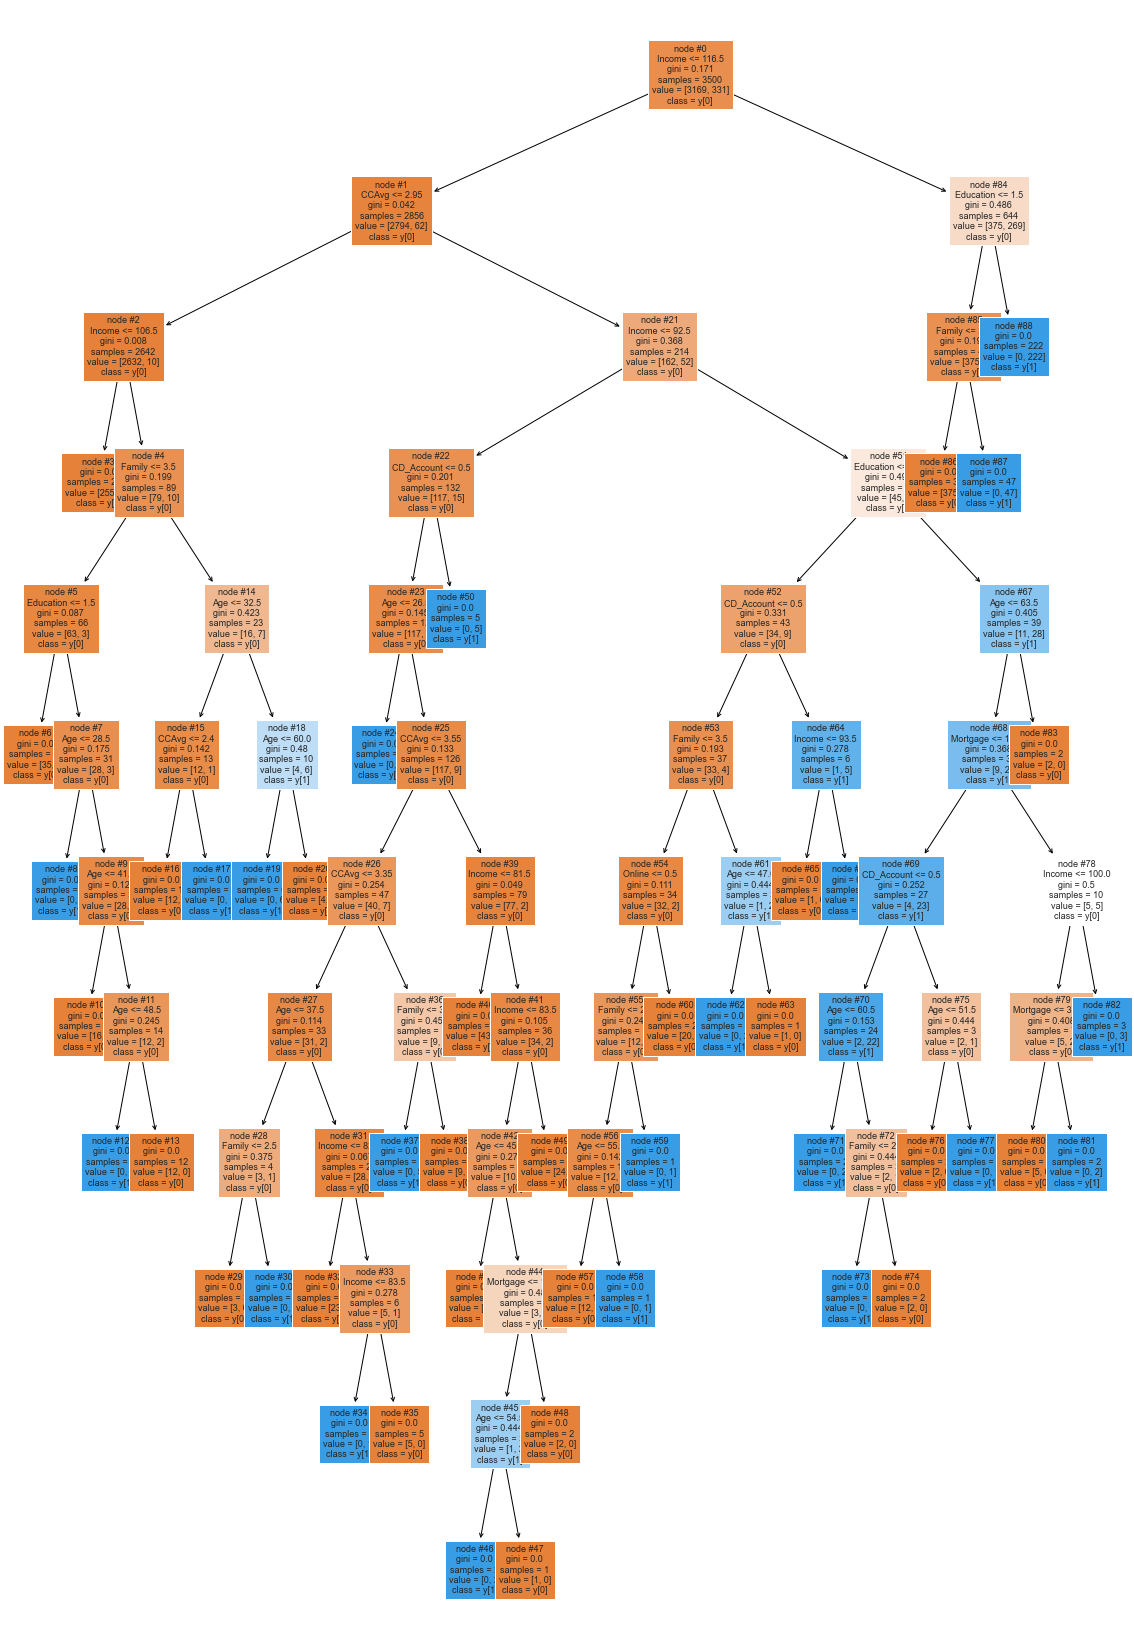

In [79]:
feature_names = list(X.columns) # Get a list of the column names to label the tree

plt.figure(figsize=(20,30))

out = tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

* Obviously this model is too complex. It's overfitting the training data and a model this complex is hard to interpret. We will need to prune the tree.  
* We can see on the right side of the tree that in 2 nodes using Income and Education we can get a Gini Impurity of 0. In just one more split using Family there is another set of leaves with a Gini Impurity of 0. This shows how powerful these variables are in predicting the target variable.

# Decision Tree

## Reducing overfitting - Pre-Pruning

### Limit Tree Depth to 3
The first thing we will try is pre pruning the tree. Our first attempt will be very basic, we will just limit the tree depth to 3 and see what happens.

In [80]:
X_train.head()

Age  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
1334   47      35    94304       2    1.3          1         0   
4768   38      39    93118       1    2.0          2         0   
65     59     131    91360       1    3.8          1         0   
177    29      65    94132       4    1.8          2       244   
4489   39      21    95518       3    0.2          2         0   

      Securities_Account  CD_Account  Online  CreditCard  
1334                   0           0       1           0  
4768                   0           0       1           0  
65                     0           0       1           1  
177                    0           0       0           0  
4489                   0           0       1           0

In [81]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

#### Limit Tree Depth to 3 - Model output metrics

Accuracy on training set :  0.9822857142857143
Accuracy on test set :  0.9753333333333334
Recall on training set :  0.8126888217522659
Recall on test set :  0.7516778523489933
Precision on training set :  1.0
Precision on test set :  1.0
F1 on training set :  0.8966666666666667
F1 on test set :  0.8582375478927203


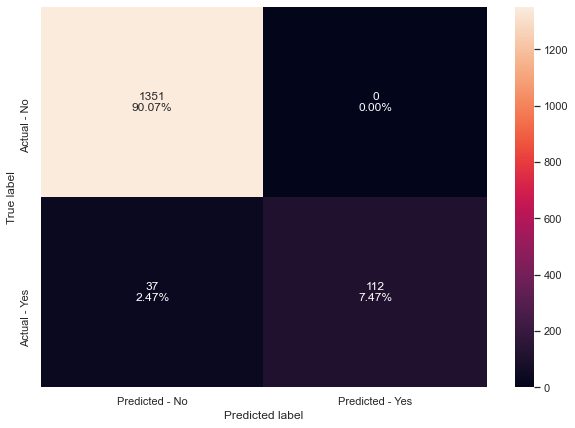

In [82]:
scores = get_metrics_score(dTree1,X_train,X_test,y_train,y_test,flag=True)
# creating confusion matrix
make_confusion_matrix(dTree1,X_test,y_test)

We can see that the metrics for the test data are slightly lower than the training data. This is usually a sign that the model is overfitting the training data and not a good generalized model. If the model was underfitting we would expect poor performance on the training data, however that is not what we see here.  
Despite the slightly poorer fit to the test data, we can see that, even this simple decision tree model, is working better than our logistic regression models:
* Accuracy on the test data is 97.53% - our best logistic regression accuracy was 94.73%
* Precision on test data is 100% - our best logistic regression accuracy was 97.23%
* Recall is 75.17% - our best logistic regression recall was 90.60%
* F1 Score is 85.82% - our best logistic regression F1 Score was 70.15%  

So the only metric that was better in the logistic regression modelling was the recall score. However that particular model/threshold combination had poor metrics for all scores except for recall.  

It appears that decision tree modelling is more suited for this particular problem.

#### Limit Tree Depth to 3 - Tree Visualization

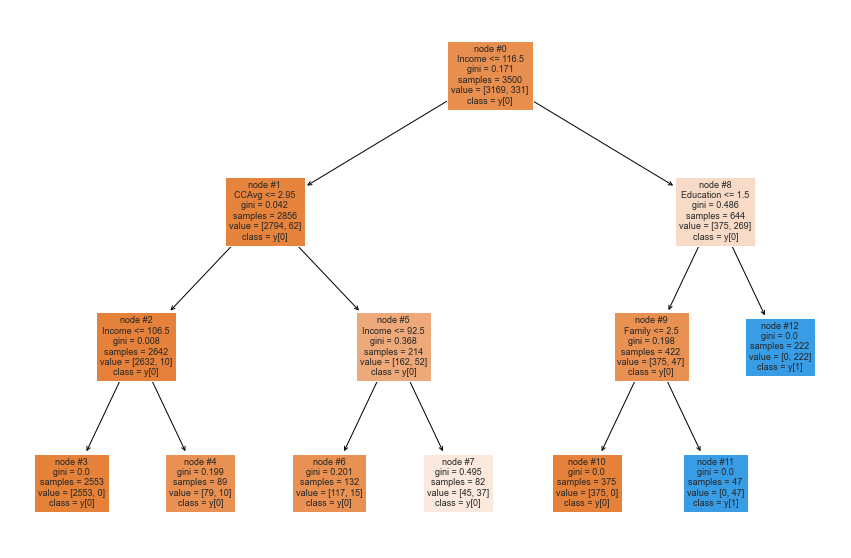

In [83]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

The tree is now a lot more readable with only 3 levels. However this model is slightly underfitting.

#### Limit Tree Depth to 3 - Feature Importances

                         Imp
Education           0.446593
Income              0.346997
Family              0.162372
CCAvg               0.044038
Age                 0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000


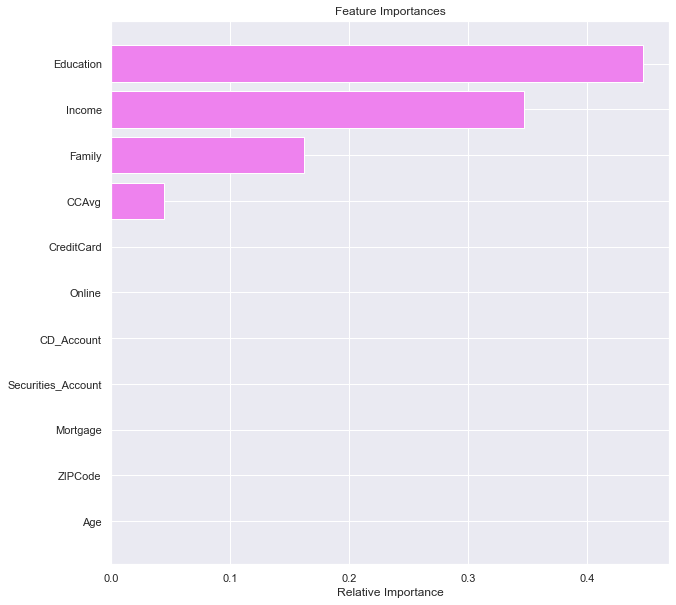

In [84]:
print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We can see that when we limit the tree depth, the features that we had highlighted before: Education, Income and Family take the top 3 spots in terms of importance. The first split of the tree is Income <=116.5, however the greatest Gini gain comes when the customers with an income greater than 116.5 are split accourding to education.

## Reducing overfitting - Pre-Pruning

### Using GridSearch for Hyperparameter tuning 
We saw that if the decision tree model is not limited in any way, it will overfit the training data and not work well as a generalized model.  If we limit the tree depth to 3 we get a model that slightly underfits the data - evinced by the fact that the fit to train and test data was different.  
We will now try to limit the tree again using hyperparameters. However this time we will test a number of different hyperparameters using a grid search. The grid search will test each possible combination of parameters using cross validation. It should then output the optimum parameter set.

### Grid Search 1 - Optimize Recall
As we don't know the marketing cost vs. opportunity cost of missing customers, we will try two optimizations: the first will try to optimize recall. The second will try to optimize F1-score.

In [85]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations, we are using recall here
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

#### Grid Search 1 - Optimize Recall Model Metrics

Accuracy on training set :  0.9897142857142858
Accuracy on test set :  0.9813333333333333
Recall on training set :  0.9274924471299094
Recall on test set :  0.8791946308724832
Precision on training set :  0.9623824451410659
Precision on test set :  0.9290780141843972
F1 on training set :  0.9446153846153847
F1 on test set :  0.9034482758620689


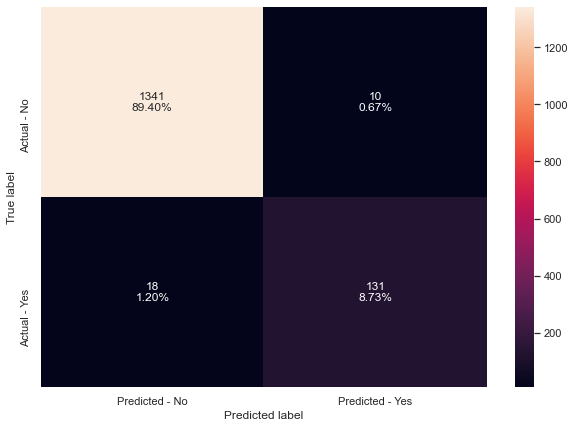

In [86]:
scores = get_metrics_score(estimator,X_train,X_test,y_train,y_test,flag=True)
# creating confusion matrix
make_confusion_matrix(estimator,X_test,y_test)

**Note: I will comment on the model metrics in a summary a little way down the page.**

#### Grid Search 1 - Optimize Recall - Feature Importances

                         Imp
Education           0.447999
Income              0.328713
Family              0.155711
CCAvg               0.042231
CD_Account          0.025345
Age                 0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


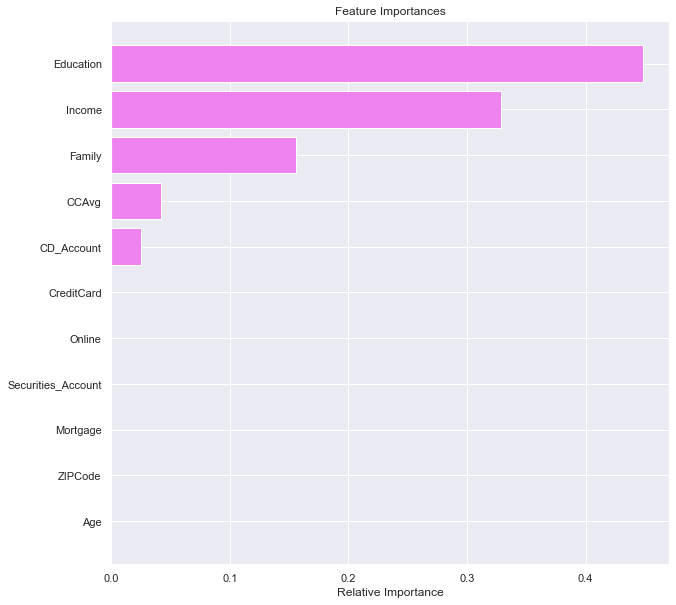

In [87]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [88]:
#Let's create a comparison frame to better compare the feature importances from the various models.
comparison_frame = pd.DataFrame({'Model':['Unpruned Tree',
                                          'Limit Depth to 3', 
                                          'Optimize Recall'], 
                                 'Education':[0.4015,0.4466,0.4480],
                                 'Income':[0.3083,0.3470,0.3287],
                                 'Family':[0.1647,0.1624,0.1557], 
                                 'CCAvg':[0.0453,0.0440,0.0422],
                                 'CD_Account':[0.0257,0.0000,0.0253]
                                }) 

comparison_frame

Model  Education  Income  Family   CCAvg  CD_Account
0     Unpruned Tree     0.4015  0.3083  0.1647  0.0453      0.0257
1  Limit Depth to 3     0.4466  0.3470  0.1624  0.0440      0.0000
2   Optimize Recall     0.4480  0.3287  0.1557  0.0422      0.0253

* In the table above, the top 5 important features have been listed for the original unpruned tree, the tree where depth was limited to 3 and the tree with hyperparameters tuned to optimize recall.  
* The order of importance and the magnitude of importance is very similar for each of the trees.
* This again reiterates that the marketing department should target, high income earners > 116K, people with larger families (3-4) and people with high educations (levels 2 and 3).

#### Grid Search 1 - Optimize Recall - Tree Visualization

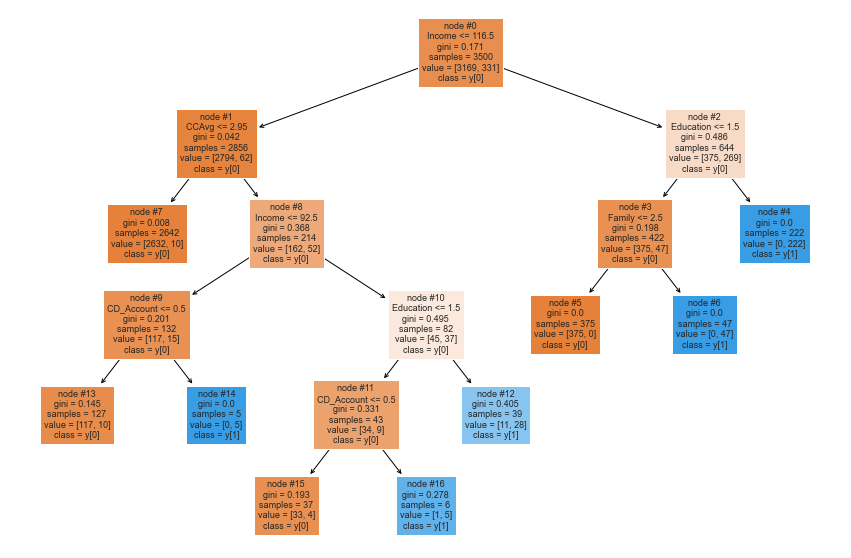

In [89]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

When we optimize the hyperparameters on the recall score, the tree grew to 5 levels. The tree is still easy to read despite the five levels. Our recall score is 87.92% on the test data. This is down slightly on 88.59% on our hopelessly overfit unbounded tree. A loss of recall of less than 1% for a massive reduction in complexity is a very good trade-off.

### Grid Search 2 - Optimize F1-Score
Now we will run the grid search again. This time, rather than optimize the recall score, we will optimise the F1 score.

In [90]:
# Choose the type of classifier. 
estimator1 = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations, this time we use f1 score
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator1, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator1 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

#### Grid Search 2 - Optimize F1 Score - Model Metrics

Accuracy on training set :  0.9897142857142858
Accuracy on test set :  0.9813333333333333
Recall on training set :  0.9274924471299094
Recall on test set :  0.8791946308724832
Precision on training set :  0.9623824451410659
Precision on test set :  0.9290780141843972
F1 on training set :  0.9446153846153847
F1 on test set :  0.9034482758620689


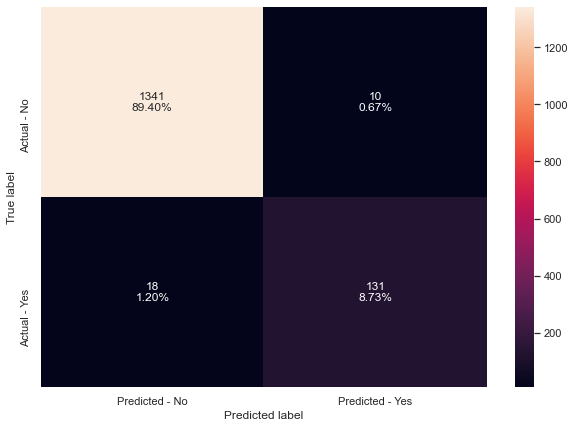

In [91]:
scores = get_metrics_score(estimator1,X_train,X_test,y_train,y_test,flag=True)
# creating confusion matrix
make_confusion_matrix(estimator1,X_test,y_test)

### Comment on strange output

These statistics are exactly the same as when we optimized the hyperparameters on recall. It turns out that we get EXACTLY the same model. I tested the code attempting to optimize on precision score and it does give a different output - so I know that the code is working correctly. It turns out that optimizing on precision or recall gives the same model. This is good news because these are the two metrics that we are attempting to maximize. The fact that we can do both in one model simplifies things.

We can prove to ourselves that the model is exactly the same by looking at the tree visualization below

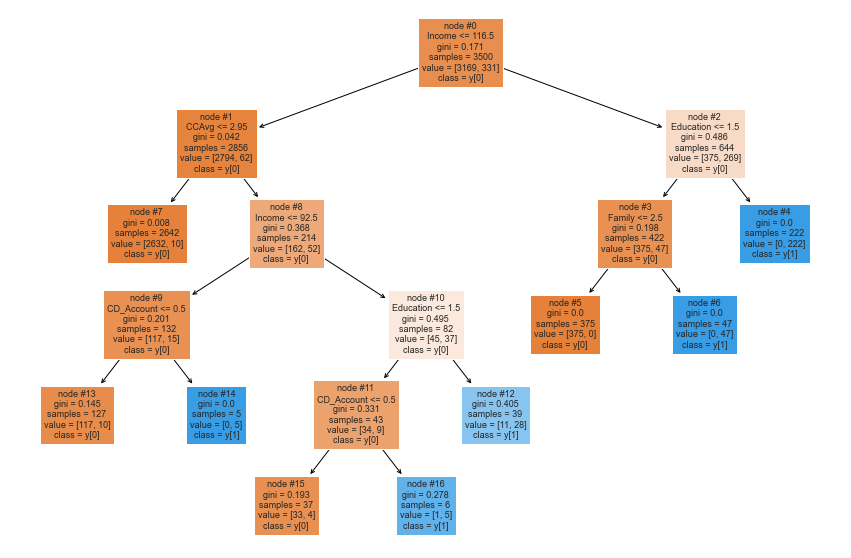

In [92]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(estimator1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

* This model is **exactly** the same as the model created when we optimized hyperparameters for Recall. Again, I tested the code by optimizing for precision and I do get a different model. In fact I ran it a few times just to be sure.  

* The optimum hyper parameter set for recall is the same as the optimal hyper parameter set for F1 score.

This concludes our pre-pruning optimization attempts. Before we move onto post pruning. Let's do a recap of what we have so far.

In [93]:
#Let's create a comparison frame to better compare the models we have so far.
comparison_frame = pd.DataFrame({'Model':['LR - Default Threshold', 
                                          'LR - ROC Optimal Threshold',
                                          'LR - Precision-Recall Threshold',
                                         'DT - Limit Depth 3',
                                         'DT - Hyperparameter Optimize'], 
                                 'Test_Accuracy':[94.73,87.33,94.67,97.53,98.13],
                                 'Test Precision':[87.23,43.41,78.99,100.00,92.91],
                                 'Test Recall':[55.03,90.60,63.09,75.17,87.92], 
                                 'Test F1':[67.49,58.69,70.15,85.82,90.34]                                 
                                }) 

comparison_frame

Model  Test_Accuracy  Test Precision  \
0           LR - Default Threshold          94.73           87.23   
1       LR - ROC Optimal Threshold          87.33           43.41   
2  LR - Precision-Recall Threshold          94.67           78.99   
3               DT - Limit Depth 3          97.53          100.00   
4     DT - Hyperparameter Optimize          98.13           92.91   

   Test Recall  Test F1  
0        55.03    67.49  
1        90.60    58.69  
2        63.09    70.15  
3        75.17    85.82  
4        87.92    90.34

* In the table above, we summarize the metrics of the test data. Note that the original LR model with unscaled inputs was dropped as our scaled inputs worked better on all metrics. The unpruned DT model was not included in the table as the model is too complex and overfit. It was not added to the table to make the table easier to read. 
* So far, our best model is the decision tree with hyperparameters optimized on the Recall/F1 score. We got the same model for both optimization attempts.
* We can see that this model has a very high F1 score of 90.34. The test recall is also very good at 87.92%

## Reducing overfitting - Post-Pruning


In [94]:
# We initialize a decision tree classifier with no hyper parameters (other than random state) and call it clf
clf = DecisionTreeClassifier(random_state=1)  
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities # Create a data from with the alphas and impurities

In [95]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000223    0.001114
2     0.000268    0.002188
3     0.000359    0.003263
4     0.000381    0.003644
5     0.000381    0.004025
6     0.000381    0.004406
7     0.000409    0.006042
8     0.000476    0.006519
9     0.000527    0.007046
10    0.000582    0.007628
11    0.000593    0.008813
12    0.000641    0.011379
13    0.000769    0.014456
14    0.000882    0.017985
15    0.001552    0.019536
16    0.002333    0.021869
17    0.003024    0.024893
18    0.003294    0.028187
19    0.006473    0.034659
20    0.023866    0.058525
21    0.056365    0.171255

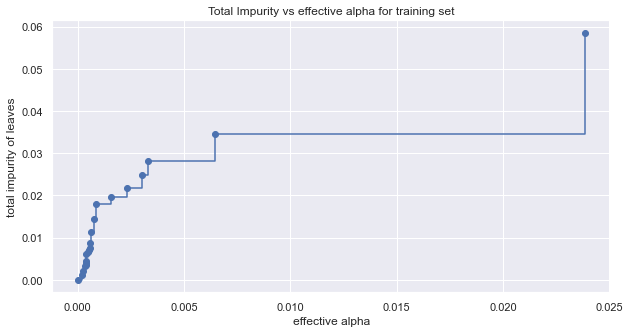

In [96]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Now that we have a list of effective alpha values, we train a decision tree using them. We can see that as alpha increases, the impurity of the leaves also increases.  
The last value in ccp_alphas is the alpha value that prunes the whole tree. The tree with clfs[-1] will have one node.

In [97]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

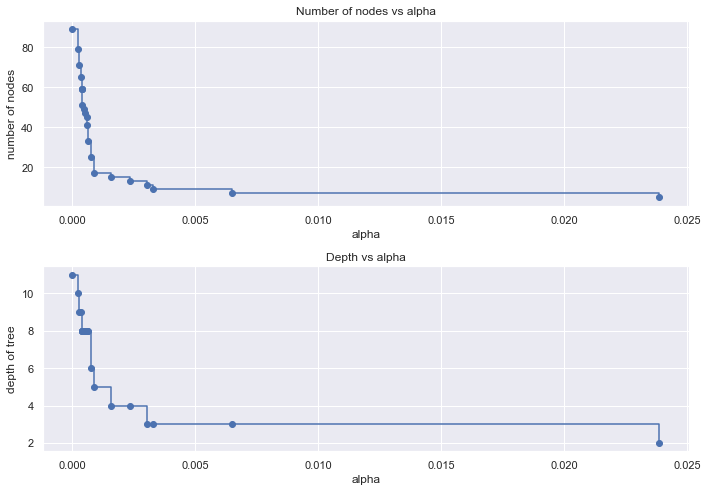

In [98]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

We can see here that, as ccp alpha increases, the total number of nodes and the depth of the tree decreases.

## Accuracy vs. Alpha For Training and Test Data

In this next section, we will use the ccp alphas to post-prune the tree. Again, we need to decide on a metric that we want to optimize. We will try all of them and see what happens. Immediately below we will optimize accuracy.

In [99]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

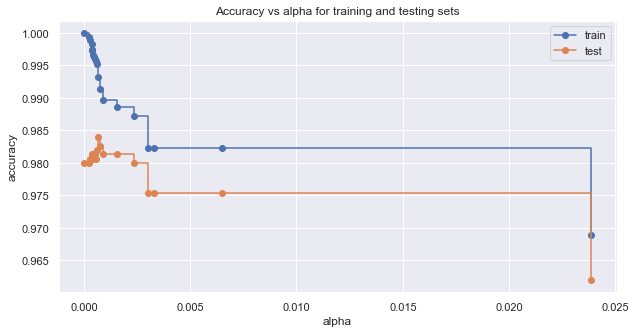

In [100]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

We can see that, at very low alphas, the accuracy is very high as on the training data and lower on the test data. This is because the model is overfitting the training data and doesn't work well as a generalized model. As the alpha reduces, the model becomes less overfit and the accuracy on the test data goes up (while the accuracy on the training goes down). At a certain point, the tree becomes underfit to both the training and test data and the accuracy of the model reduces due to the model being overly simplistic.

It's interesting that the accuracy on the test data is always higher on the training data even as the model becomes less overfit. I have seen this in other examples of decision tree modelling. It is likely that decision trees are always a little bit overfit to the training data, as that is where the intial patterns the machine learns are generated.

In [101]:
#Let's look at the tree parameters and get the alpha which maximizes accuracy.
index_highest_accuracy_model = np.argmax(test_scores)
highest_accuracy_model = clfs[index_highest_accuracy_model]
print(highest_accuracy_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')


In [102]:
scores = get_metrics_score(highest_accuracy_model,X_train,X_test,y_train,y_test,flag=True)

Accuracy on training set :  0.9931428571428571
Accuracy on test set :  0.984
Recall on training set :  0.9637462235649547
Recall on test set :  0.9060402684563759
Precision on training set :  0.9637462235649547
Precision on test set :  0.9310344827586207
F1 on training set :  0.9637462235649547
F1 on test set :  0.9183673469387755


The highest accuracy is achieved when alpha is = 0.00064. We can see the scores above. We will compare them in a table a little lower down the page. Right now, we will look at what happens when we use ccp alphas to prune the tree to maximize precision, recall and F1 Score.

## Precision vs. Alpha For Training and Test Data
Above we saw the highest accuracy was achieved with an alpha of 0.00064. Let's see what alpha value would maximize precision.

In [103]:
precision_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.precision_score(y_train,pred_train3)
    precision_train.append(values_train)

In [104]:
precision_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.precision_score(y_test,pred_test3)
    precision_test.append(values_test)

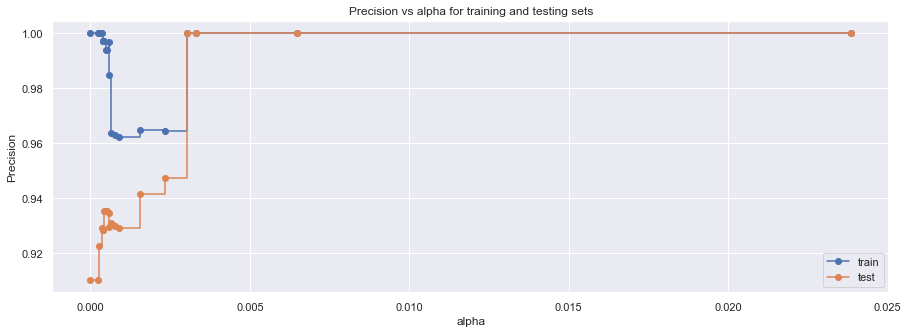

In [105]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Precision")
ax.set_title("Precision vs alpha for training and testing sets")
ax.plot(ccp_alphas, precision_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, precision_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [106]:
index_highest_precision_model = np.argmax(precision_test)
highest_precision_model = clfs[index_highest_precision_model]
print(highest_precision_model)

DecisionTreeClassifier(ccp_alpha=0.003023521760901227, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')


In [107]:
scores = get_metrics_score(highest_precision_model,X_train,X_test,y_train,y_test,flag=True)

Accuracy on training set :  0.9822857142857143
Accuracy on test set :  0.9753333333333334
Recall on training set :  0.8126888217522659
Recall on test set :  0.7516778523489933
Precision on training set :  1.0
Precision on test set :  1.0
F1 on training set :  0.8966666666666667
F1 on test set :  0.8582375478927203


The highest precision score is achieved when our alpha value is 0.00302. Again we will compare all the metrics in a table a little further down the page.

## Recall vs. Alpha For Training and Test Data
We have optimized our post-pruning on accuracy and precision. Now let's optimize for recall and see what we get.

In [108]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [109]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

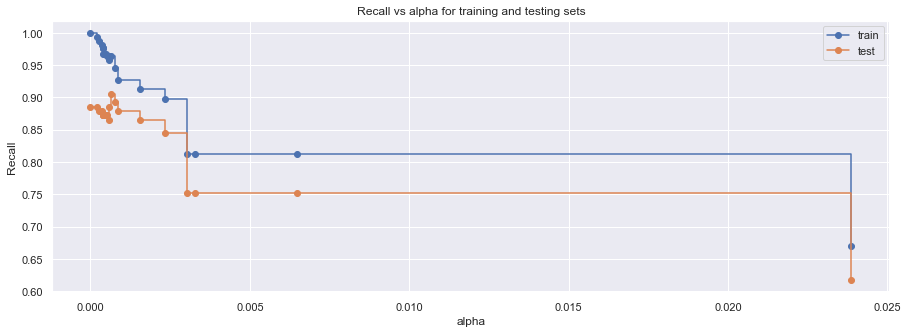

In [110]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [111]:
index_highest_recall_model = np.argmax(recall_test)
highest_recall_model = clfs[index_highest_recall_model]
print(highest_recall_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')


The highest recall score is achieved in the test data when alpha = 0.00064. This is the **same** value that gave us the highest accuracy score. There is no point writing out the metrics of the model, given they will be exactly the same as those when we optimized for accuracy.

## F1 vs. Alpha For Training and Test Data
Finally, let's optimize post pruning on the F1 Score

In [112]:
f1_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.f1_score(y_train,pred_train3)
    f1_train.append(values_train)

In [113]:
f1_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.f1_score(y_test,pred_test3)
    f1_test.append(values_test)

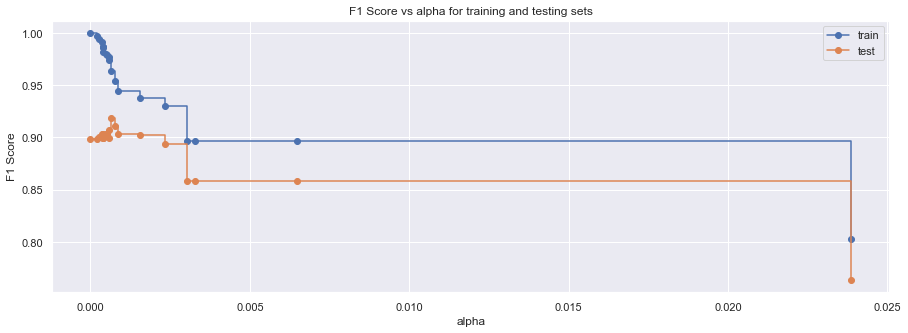

In [114]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [115]:
index_highest_f1_model = np.argmax(f1_test)
highest_f1_model = clfs[index_highest_f1_model]
print(highest_recall_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')


Again, we see the same alpha score of 0.0006414. So the model with the highest test data accuracy, also has the highest recall and F1 Score. Given that high recall and F1 score is what we are after, it is convinient that the highest scores are in the same model. Above I mentioned that we would compare the metrics from each of the optimizations. Given that optimizing on precision was the only model that gave a separate set of metrics, and we are not really worried about this score, we will not generate a table. Given that, when we looked at optimizing accuracy, recall and F1-score we got the same model, we will certainly look deeper into the metrics of this model. However, first let's take a closer look at this model.

# Post-Pruing Optimal Model for Accuracy/Recall/F1
We saw that, when post pruning the decision tree, the same model gave the highest Accuracy, Recall and F1 Score. Let's take a closer look at this model

### Post Pruned Model - Visualizaition

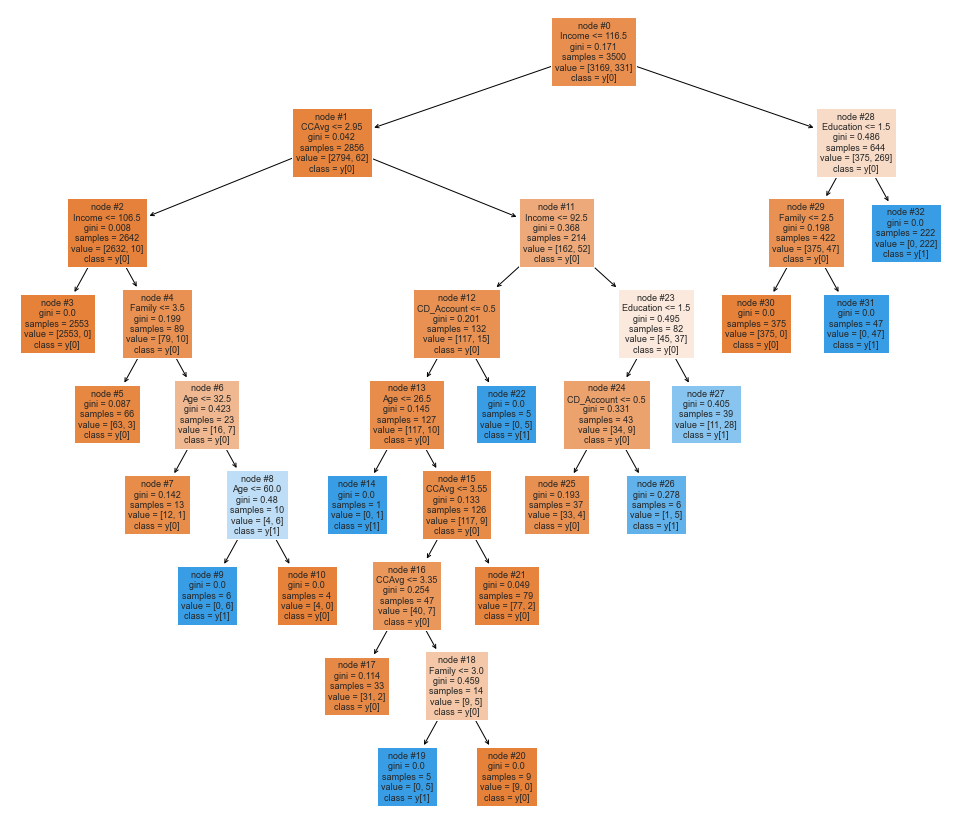

In [116]:
plt.figure(figsize=(17,15))

out = tree.plot_tree(highest_recall_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

Our post pruned tree is a little more complex than our pre-pruned tree (depth of 8 rather than 5), however it is still fairly easy to read, especially compared to a completely unbounded tree. We can see, on the right side of the tree, there are some very short paths to pure class one (gini=0, class=1, this represents parts of the data where all customers have a personal loan).
* If we take customers with an income greater than \$116.5k and with an education level of 2 or 3, we have a pure class one leaf.
* If we take customers with an income greater than \$116.5k, an education level of 1 and a family of 3 or 4, we have another pure class one leaf.

This reiterates what we have seen so far. High income customers with high education, or high income customers with a large family are prime targets for the banks marketing department.

### Post Pruned Model - Feature Importances
Let's take a look at the feature importances of this model.

                         Imp
Education           0.429489
Income              0.319013
Family              0.164852
CCAvg               0.045185
CD_Account          0.024298
Age                 0.017163
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


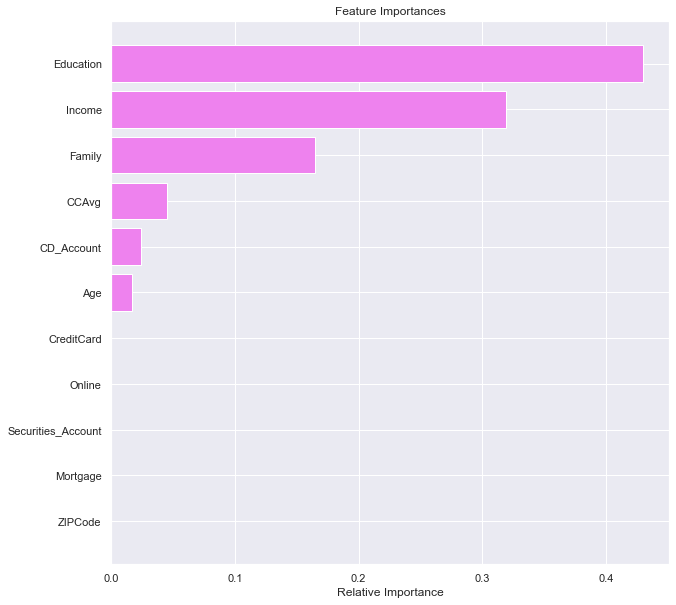

In [117]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(highest_recall_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

importances = highest_recall_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* We see the same important features in the same order as we have seen throughout. The only difference here is that the Age feature now has a value in this slightly more complex model. 
* In the completely unbounded tree the order was Education 0.40, Income 0.31, Family 0.16, CCAvg 0.05, CD_Account 0.03, Mortgage 0.01, Online 0.006, with other features scoring 0.

### Post Pruned Model - Metrics

Accuracy on training set :  0.9931428571428571
Accuracy on test set :  0.984
Recall on training set :  0.9637462235649547
Recall on test set :  0.9060402684563759
Precision on training set :  0.9637462235649547
Precision on test set :  0.9310344827586207
F1 on training set :  0.9637462235649547
F1 on test set :  0.9183673469387755


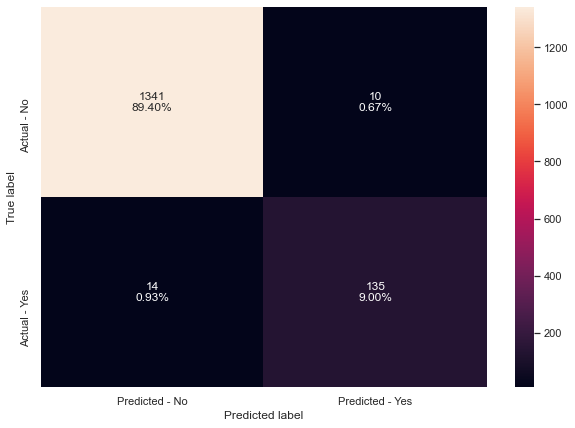

In [118]:
scores = get_metrics_score(highest_recall_model,X_train,X_test,y_train,y_test,flag=True)
# creating confusion matrix
make_confusion_matrix(highest_recall_model,X_test,y_test)

We can see that the metrics for this model are very good. The best yet in fact. In the following section I will compare this model to the others and give some more comments.

# --------------------------------------------------------------------------------------------------------------

# Comparison of All Models
### Metrics

In [119]:
#Let's create a comparison frame to better compare the metrics above with all the other models
comparison_frame = pd.DataFrame({'Model':['LR - Default Threshold', 
                                          'LR - ROC Optimal Threshold',
                                          'LR - Precision-Recall Threshold',
                                         'DT - Unpruned',
                                         'DT - Limit Depth 3',
                                         'DT - Hyperparameter Optimize',
                                         'DT - Post Pruning'], 
                                 'Test_Accuracy':[94.73,87.33,94.67,98.00,97.53,98.13,98.40],
                                 'Test Precision':[87.23,43.41,78.99,91.03,100.00,92.91,93.10],
                                 'Test Recall':[55.03,90.60,63.09,88.59,75.17,87.92,90.60], 
                                 'Test F1':[67.49,58.69,70.15,89.80,85.82,90.34,91.84]                                 
                                }) 

comparison_frame

Model  Test_Accuracy  Test Precision  \
0           LR - Default Threshold          94.73           87.23   
1       LR - ROC Optimal Threshold          87.33           43.41   
2  LR - Precision-Recall Threshold          94.67           78.99   
3                    DT - Unpruned          98.00           91.03   
4               DT - Limit Depth 3          97.53          100.00   
5     DT - Hyperparameter Optimize          98.13           92.91   
6                DT - Post Pruning          98.40           93.10   

   Test Recall  Test F1  
0        55.03    67.49  
1        90.60    58.69  
2        63.09    70.15  
3        88.59    89.80  
4        75.17    85.82  
5        87.92    90.34  
6        90.60    91.84

* The table above gives the Accuracy, Precision, Recall and F1 Score for the TEST data. All values are percentages. 
* We have talked about the scores for the Logistic Regression models in the previous section. The best logistic regression model was the one created with scaled inputs (age, mortgage and income) and a threshold read from the Precision-Recall Curve.
* ALL of the decision tree models perform better than the best logistic regression model on this particular data set.
* We are trying to maximise the Recall and F1 Scores. We can see that the unpruned tree has decent Recall and F1 scores. However, the downside is that this model is incredibly complicated and overfits the training data. We can actually achieve better results from less complicated models.
* When attempting to pre-prune the tree by bounding tree hyperparamters. Our cross-validated grid search found that the optimum hyperparameters for recall score were the same as for F1 score. This is good news as it means one model maximizes both of the metrics that are of most interest to us. The resulting model was also reasonably simple with a max depth of 5 and 17 nodes/leaves.
* Our best Recall and F1 Scores were achieved with a post pruned tree. This tree is slightly more complex with a max depth of 8 and 33 nodes/leaves but certainly still easy to read.
* To reiterate: **The best model and the model I would recommend passing to the marketing team is the Post Pruned Decision Tree model.**

# Actionalble Insights and Recommendations
There have already been many comments on actionalble insights and recommendations throughout the notebook. Let's summarize them here:

### Summary of Observations

* For our logistic regression model, the features with the top 5 highest coefficents were Income(scaled), CD_Account, Education, Family, Mortgage(scaled)
* For our decision tree models, the features with the top 5 highest Gini Importance were Education, Income, Family, CCAvg and CD_Account
* In every decision tree model, the first split was on Income <= \$116.5k. From there we could quickly reach a pure leaf of class 1 (customers which has a personal loan) with the following:
    - If we take customers with an income greater than \$116.5k and with an education level of 2 or 3, we have a pure class one leaf.
    - If we take customers with an income greater than \$116.5k, an education level of 1 and a family of 3 or 4, we have another pure class one leaf.
* We saw this in our EDA when we plotted income vs. family coloured by personal loan and income vs. education coloured by personal loan.
* Another thing we observed in our EDA is that 46\% of customers with a CD Account also had a personal loan. This is likely why CD account features in the top 5 highest coefficients in our logistic regression model. However only 6\% of customers actually had a CD Account, which is likely why we don't see it listed in the top 5 feature importances for the decision tree models.

### Recommendations - my advice to grow the business

AllLife wants to wants to "explore ways of converting its liability customers to personal loan customers (while retaining them as depositors)". In plain English: The bank wants to sell more personal loans to its customers. We have been working on the assumption that: If was can establish a pattern of "customer-types" that have a personal loan, then marketing to customers with a similar type will likely achieve the highest return for money spent on marketing.

Let's restate the objectives and answer them using our findings.

#### Objectives
**1) To predict whether a liability customer will buy a personal loan or not.**  
The optimal way of establishing if a given customer is the type of customer who is likely to open a personal loan is to plug the customers information into our decision tree model with post pruning and see what the model predicts. This model had the highest F1 Score and recall. So it will minimize the amount of marketing money spent on customers unlikely to open a personal loan AND minimize the opportunity cost of missing customers who will likely open a personal loan.

**2) Which variables are most significant.**  
This was stated directly above in the summary of observations: Income, Education, Family are the main 3. Folowed by CCAvg and CD_Account.

**3) Which segment of customers should be targeted more.**  
* Customers with an income greater than 116.5k with education level 2 or 3.  
* Customers with an income greater than 116.5k with a family size of 3 or 4.  
* There are 480 customers with a personal loan (9.6% of 5000). There are 269 customers who fit into the above two lines (i.e. 56% of customers with a personal loan can be found using the above two lines of logic). Customers in this demographic: high income WITH high education OR large family should be targeted by the marketing campaign.  
* It is also worth mentioning that 46% of customers with a CD Account have a personal loan. If a customer does not fit into the high income/family/education demographic but they have a CD Account, they should also be targeted.

# Misclassification analysis
Let's take a look at our confusion matrix again as it will show us how many customers we have misclassified:

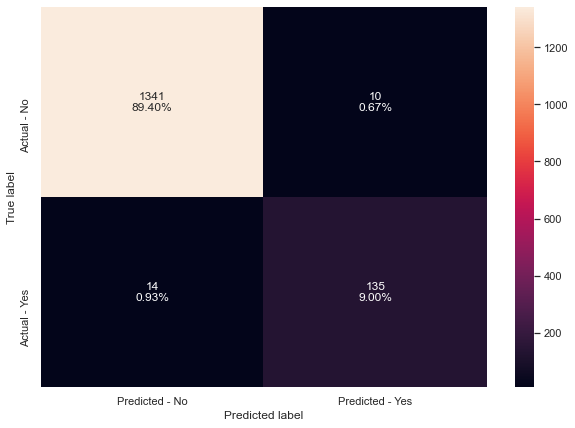

In [120]:
make_confusion_matrix(highest_recall_model,X_test,y_test)

* There are 10 customers that the model has predicted have a home loan that do not have a home loan. I.e. A false positive. This represents 0.67% of the total 1500 customers in the test data.
* There are 14 customers that the model has predicted not to have a home loan that do have a home loan. I.e. A false negative. This represents 0.93% of the total 1500 customers in the test data.

We can actually look at our data tree and see exactly where the misclassifications are occuring:

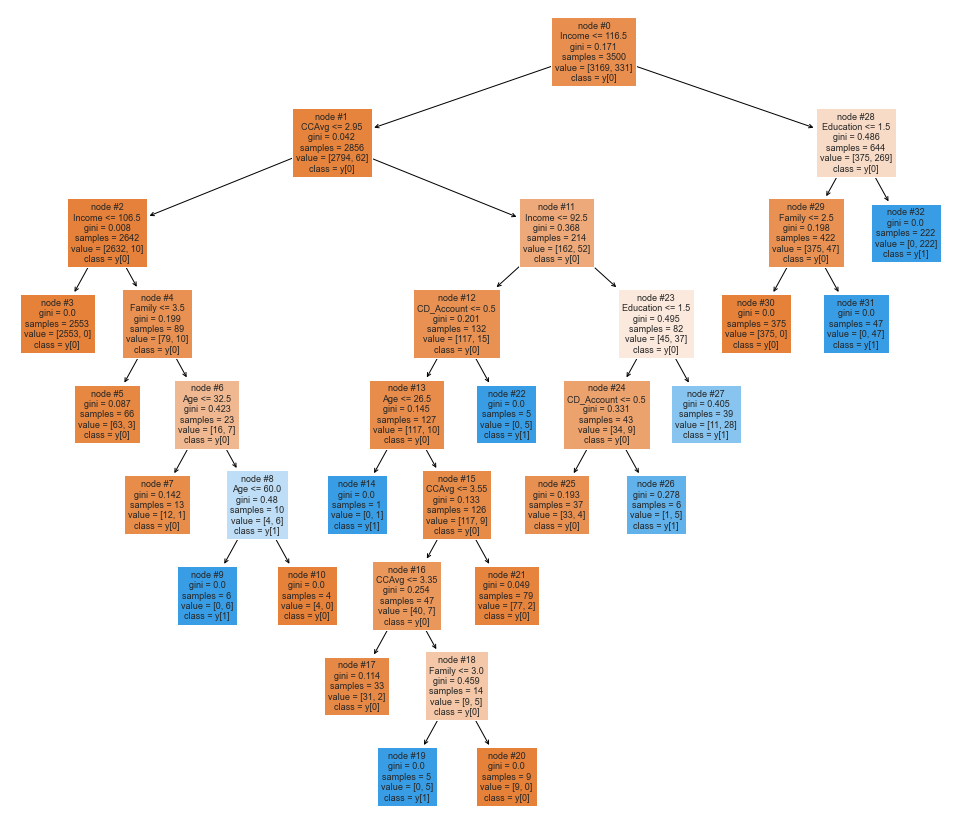

In [121]:
plt.figure(figsize=(17,15))

out = tree.plot_tree(highest_recall_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

* Leaves that are dark blue or dark orange are 100% pure. You can also read the Gini Impurity (G.I.) score, "gini" on the tree. It's the second line on each node. When gini = 0 the node is 100% pure, i.e. either all class 0 (not having a personal loan) or all class 1 (having a personal loan). The most impure nodes are light blue or orange and have a higher G.I. score, with 0.5 being the most impure node possible.
* With this in mind, we can find exactly where our model is misclassifying customers simply by looking for leaves with a G.I. higher than zero.
* We can see that to the right of the tree (following the false arrow on the first split), all of the leaves have a G.I. of 0, so all customers have been classified correctly.
* The leaf with the highest G.I. score is node #27 This represents customers with an income greater than 92.5k (but less than 116.5k), an average credit card spend per month greater than 2.95k AND an education level of 2 or 3.
* In fact there are a number of impure leaves close to the one mentioned above. Nodes 25, 26 and the aformentioned 27 have the highest 3 G.I. scores (for leaf nodes). These leaves branch from the CCAvg > 2.95k, 116.5k > Income > 92.5. So to put this in plain English: Customers with an income between 92.5k and 116.5k AND CCAvg greater than 2.95k/month are misclassified most often.

That's it! Hopefully I have satisfied all the points on the marking rubric. Thanks for reading this far.  
Ben Hardy  
May 2021